# HR Employee Attrition Analysis 

# Problem statement

Prepare a model for the HR department to predict the Attrition and give the insights and suggestions 
about the factors associated with the attrition, so that HR can take preventive measure to reduce 
Attrition.

### Import Basic Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
original_data=pd.read_csv("HR_Employee_Attrition_Data1.csv")



In [3]:
df=original_data.copy()
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# observation:
(1)No missing value
(2)24 attributes are int/float and 10 are object types

In [5]:
pd.set_option('display.max_columns', 50)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [6]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [7]:
df.describe().T# transpose the matrix

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [8]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
print(df['EmployeeCount'].value_counts())
print(df['Over18'].value_counts())
print(df['StandardHours'].value_counts())

1    1470
Name: EmployeeCount, dtype: int64
Y    1470
Name: Over18, dtype: int64
80    1470
Name: StandardHours, dtype: int64


observation:- The employee count,over18,standard hour has only 1 variables in the complete dataset.
employee number/ID no significant in prediction of Attrition
we can drop these columns

In [11]:
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [12]:
df.shape

(1470, 31)

In [13]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

### Percentage of Attrition in the Company :

In [14]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
df['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Text(0.5, 1.0, 'Percentage of No. of Attrition')

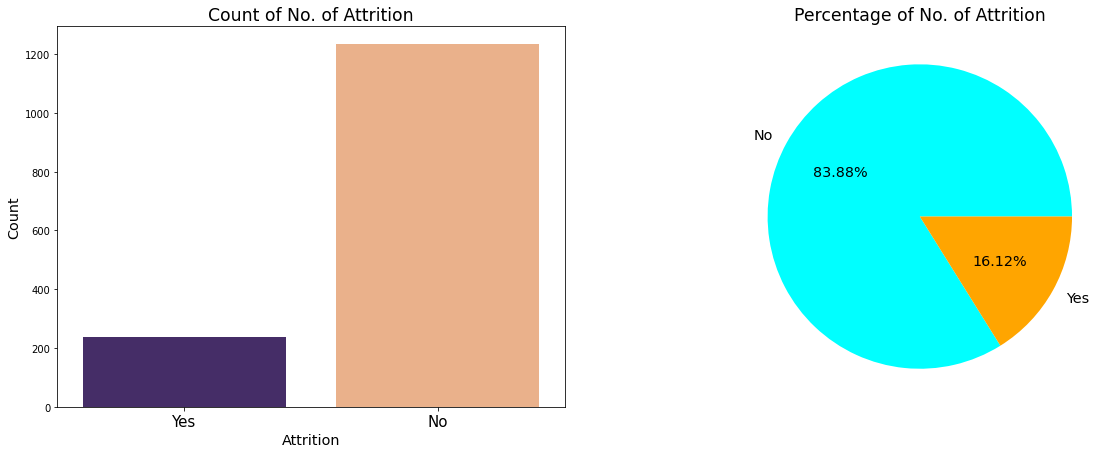

In [16]:
plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Attrition'],palette=['#432371',"#FAAE7B"])
plt.title('Count of No. of Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize=15)
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.pie(df['Attrition'].value_counts(),labels=df['Attrition'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'],textprops={'fontsize':'x-large'})
plt.title('Percentage of No. of Attrition',fontdict={'fontsize':'xx-large'})

# 16.12% or approximately 240 employee has left the job.

### Department Wise Attrition :

In [17]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [18]:
df['Department'].value_counts(normalize=True)

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

Text(0.5, 1.0, '% of Employee in Each Department')

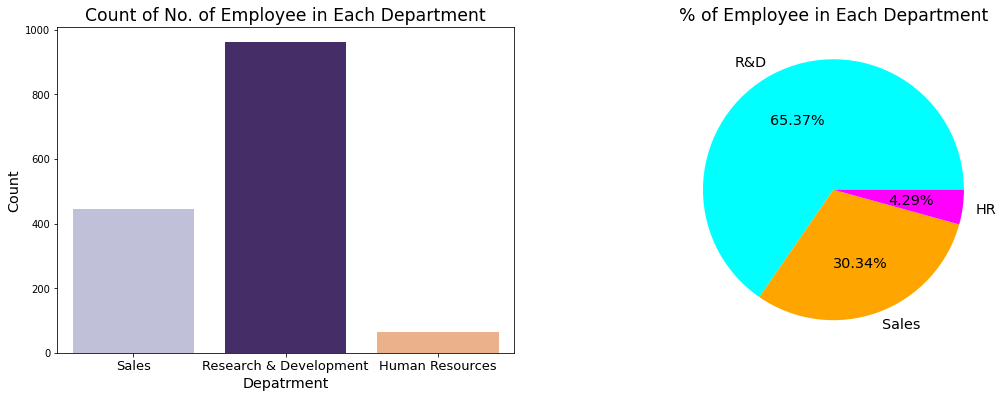

In [21]:
plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(x=df['Department'],palette=["#bcbddc",'#432371',"#FAAE7B"])
plt.title('Count of No. of Employee in Each Department',fontdict={'fontsize':'xx-large'})
plt.xlabel('Depatrment',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize=13)
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.pie(df['Department'].value_counts(),labels=['R&D','Sales','HR'],autopct='%0.2f%%',colors=['cyan','orange','magenta'],textprops={'fontsize':'x-large'})
plt.title('% of Employee in Each Department',fontdict={'fontsize':'xx-large'})

Text(0.5, 1.0, '% of Employee in Each Department')

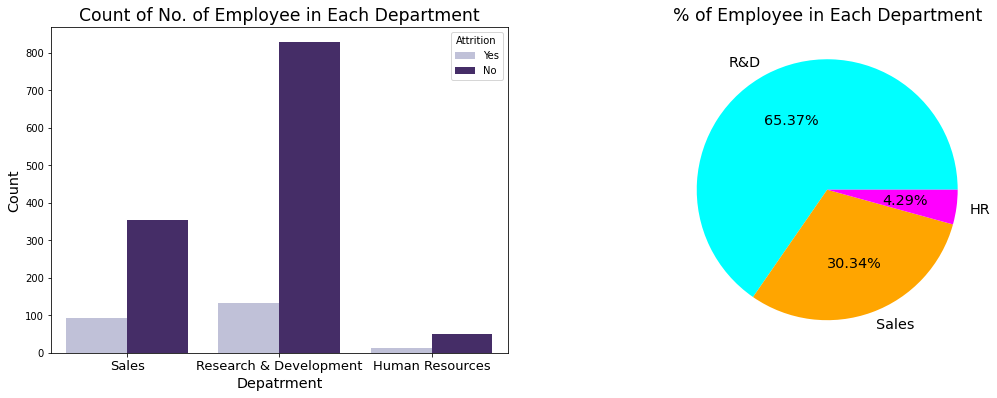

In [22]:
plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(x=df['Department'],palette=["#bcbddc",'#432371',"#FAAE7B"],hue=df['Attrition'])
plt.title('Count of No. of Employee in Each Department',fontdict={'fontsize':'xx-large'})
plt.xlabel('Depatrment',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize=13)
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.pie(df['Department'].value_counts(),labels=['R&D','Sales','HR'],autopct='%0.2f%%',colors=['cyan','orange','magenta'],textprops={'fontsize':'x-large'})
plt.title('% of Employee in Each Department',fontdict={'fontsize':'xx-large'})

observation:-

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Department',hue='Attrition',data=df)
plt.title('Department Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Department',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=15)

plt.subplots(1,3,figsize=(18,6))

plt.subplot(1,3,1)
Sales_dept=df[df['Department']=='Sales']
plt.pie(Sales_dept['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition in Sales Dept.',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,2)
R_and_D_dept=df[df['Department']=='Research & Development']
plt.pie(R_and_D_dept['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition in R&D Dept.',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,3)
HR_dept=df[df['Department']=='Human Resources']
plt.pie(HR_dept['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition in HR Dept.',fontdict={'fontsize':'xx-large'})

Text(0.5, 1.0, 'Department Wise % of No Attrition')

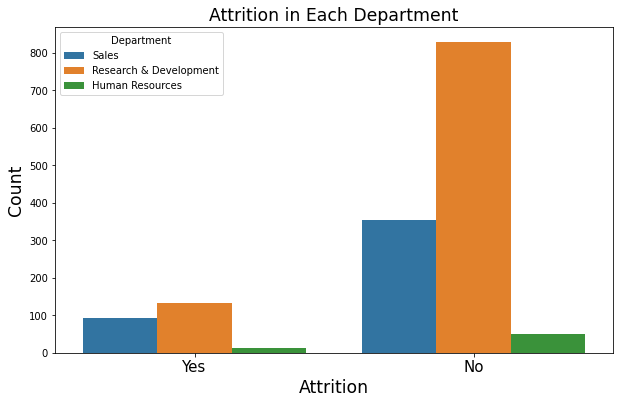

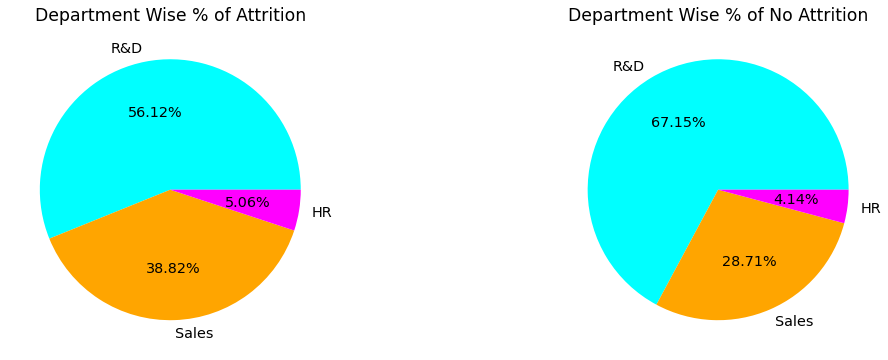

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition',hue='Department',data=df)
plt.title('Attrition in Each Department',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=15)

plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['Department'].value_counts(),labels=['R&D','Sales','HR'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Department Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['Department'].value_counts(),labels=['R&D','Sales','HR'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Department Wise % of No Attrition',fontdict={'fontsize':'xx-large'})


## Travel Frequency Wise Attrition :

Text(0.5, 1.0, 'Travel Frequency Wise % of No Attrition')

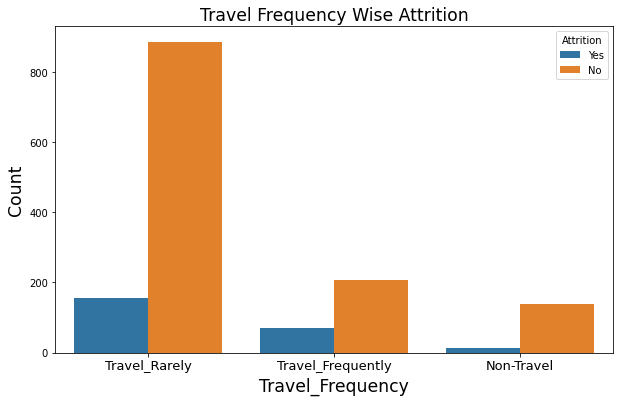

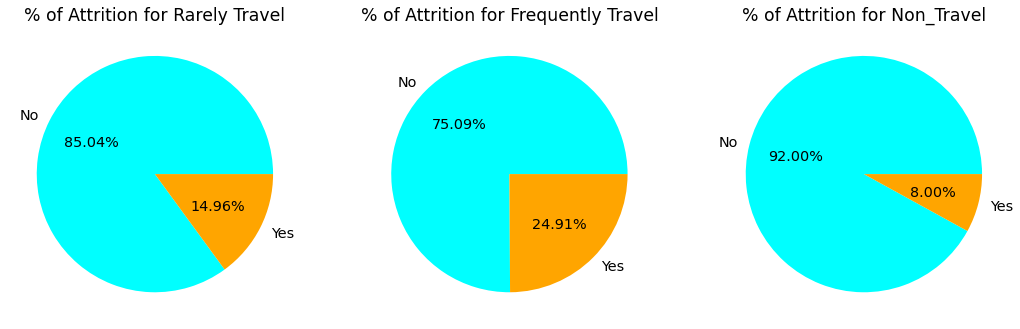

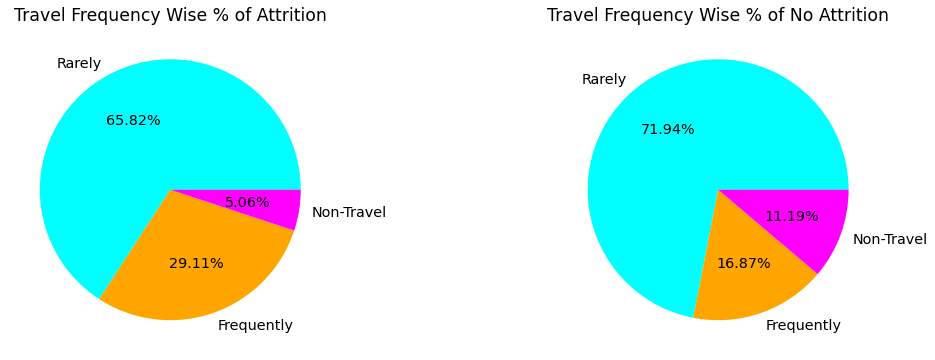

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)
plt.title('Travel Frequency Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Travel_Frequency',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)


plt.subplots(1,3,figsize=(18,6))

plt.subplot(1,3,1)
Rarely_Travel=df[df['BusinessTravel']=='Travel_Rarely']
plt.pie(Rarely_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition for Rarely Travel',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,2)
Frequently_Travel=df[df['BusinessTravel']=='Travel_Frequently']
plt.pie(Frequently_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition for Frequently Travel',fontdict={'fontsize':'xx-large'})

plt.subplot(1,3,3)
Non_Travel=df[df['BusinessTravel']=='Non-Travel']
plt.pie(Non_Travel['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition for Non_Travel',fontdict={'fontsize':'xx-large'})


plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['BusinessTravel'].value_counts(),labels=['Rarely','Frequently','Non-Travel'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Travel Frequency Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['BusinessTravel'].value_counts(),labels=['Rarely','Frequently','Non-Travel'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Travel Frequency Wise % of No Attrition',fontdict={'fontsize':'xx-large'})


# observation

(1)direct relationship between travel and attrition

## Effect of Daily Rate on Attrition :

Text(0, 0.5, 'Count')

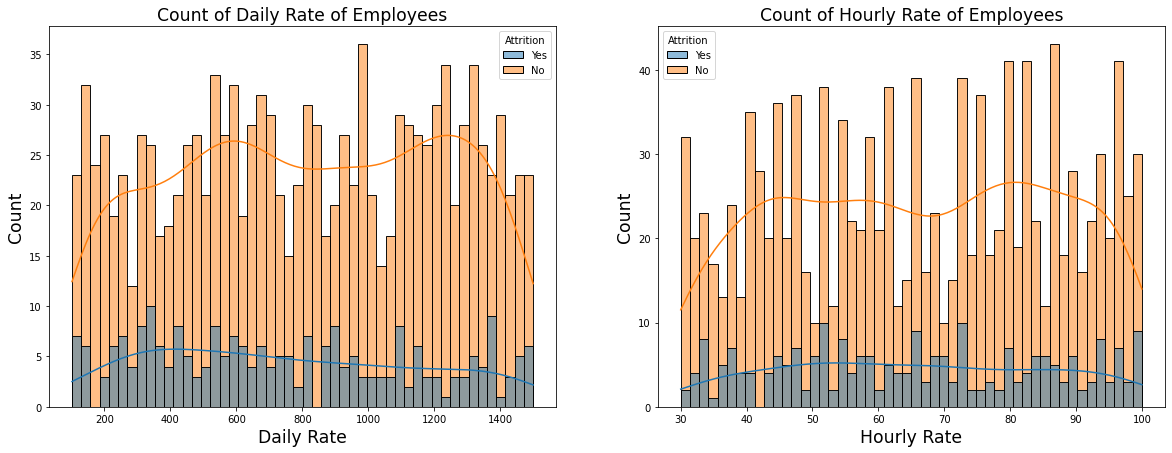

In [25]:
plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.histplot(x='DailyRate',kde=True,bins=50,hue='Attrition',data=df)
plt.title('Count of Daily Rate of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Daily Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
sns.histplot(x='HourlyRate',kde=True,bins=50,hue='Attrition',data=df)
plt.title('Count of Hourly Rate of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Hourly Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

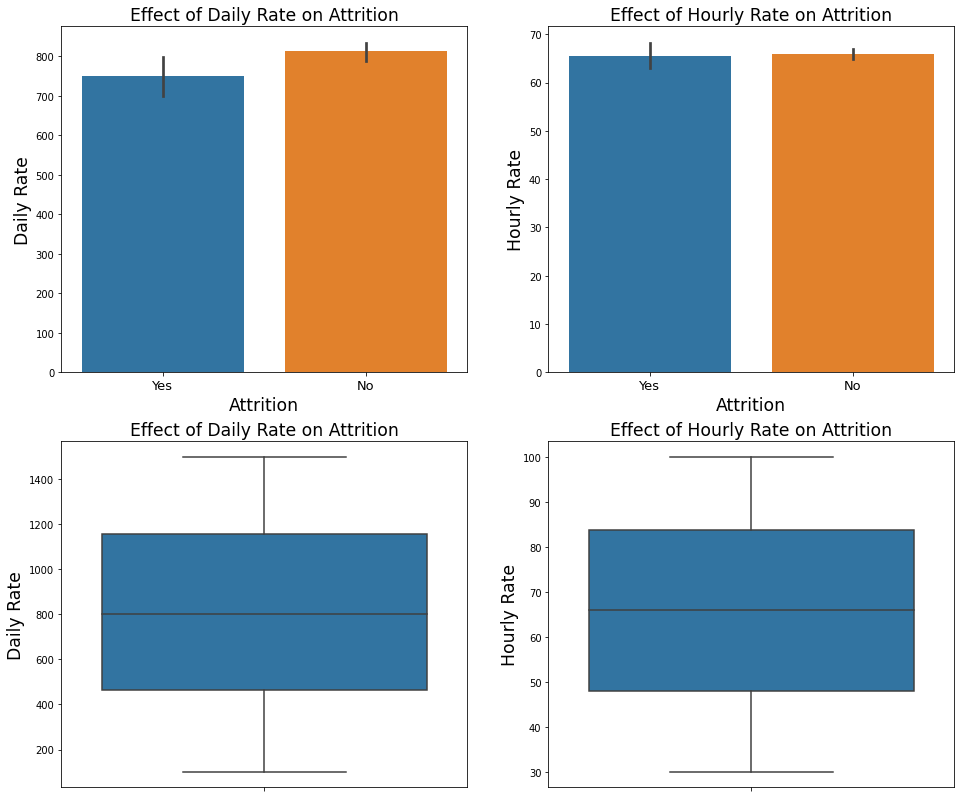

In [26]:
plt.subplots(2,2,figsize=(16,14))

plt.subplot(2,2,1)
sns.barplot(x='Attrition',y='DailyRate',data=df)
plt.title('Effect of Daily Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Daily Rate',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,2)
sns.barplot(x='Attrition',y='HourlyRate',data=df)
plt.title('Effect of Hourly Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Hourly Rate',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,3)
sns.boxplot(y='DailyRate',data=df)
plt.title('Effect of Daily Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Daily Rate',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
sns.boxplot(y='HourlyRate',data=df)
plt.title('Effect of Hourly Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Hourly Rate',fontdict={'fontsize':'xx-large'})

plt.show()

# the hourly rate daily rate has nearly no impact on attrition.

## Effect of Distance From Home on Attrition :

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

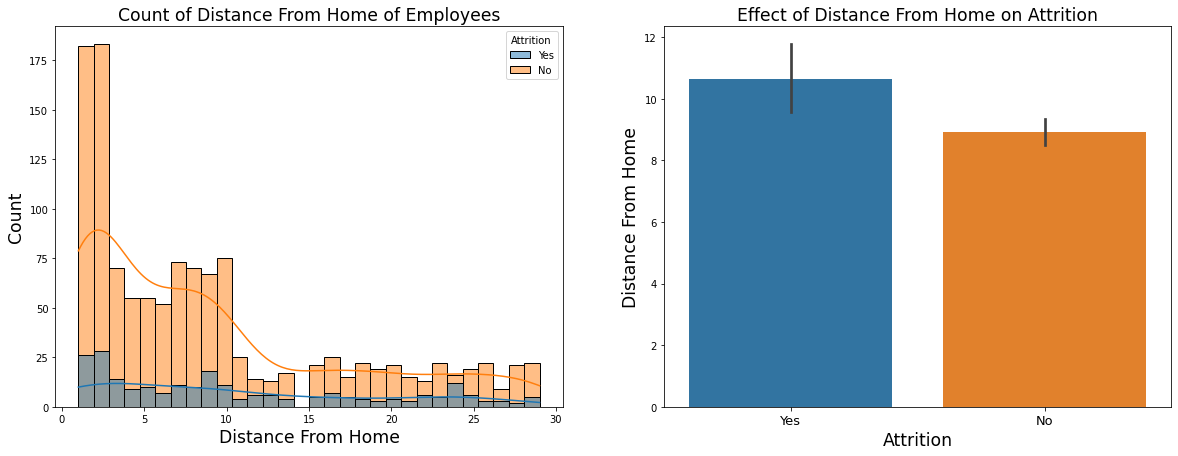

In [27]:
plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.histplot(x='DistanceFromHome',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Count of Distance From Home of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Distance From Home',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
sns.barplot(x='Attrition',y='DistanceFromHome',data=df)
plt.title('Effect of Distance From Home on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Distance From Home',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

# Employee live average 10.5 km away from office leave the job.

## Effect of Education and Education Field :

In [28]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [29]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

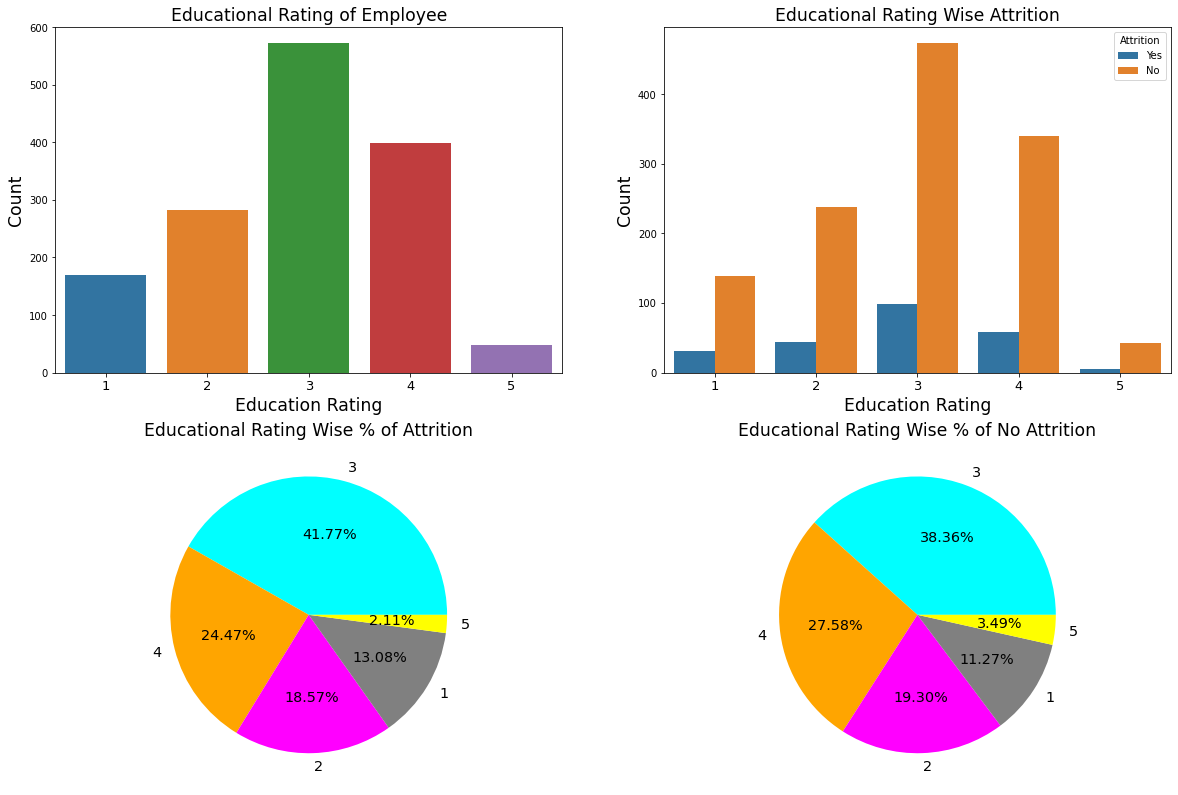

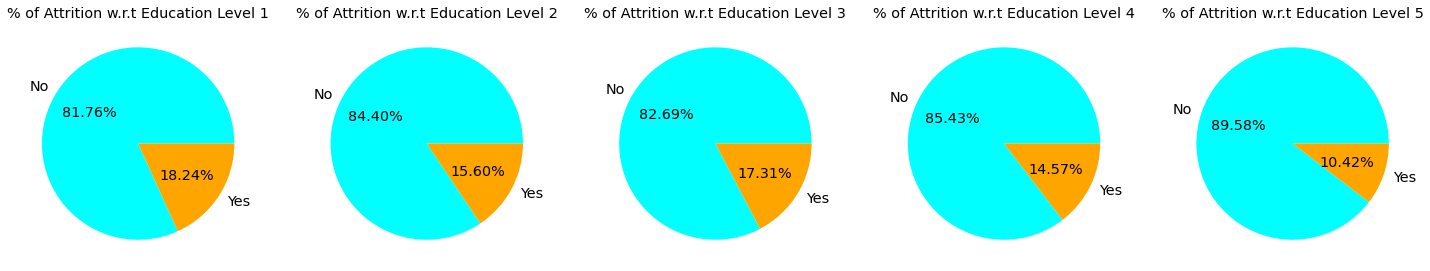

In [30]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='Education',data=df)
plt.title('Educational Rating of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Education Rating',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,2)
sns.countplot(x='Education',data=df,hue='Attrition')
plt.title('Educational Rating Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Education Rating',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['Education'].value_counts(),labels=Attrition_yes['Education'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','grey','yellow'])
plt.title('Educational Rating Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['Education'].value_counts(),labels=Attrition_no['Education'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','grey','yellow'])
plt.title('Educational Rating Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,5,figsize=(25,10))

plt.subplot(1,5,1)
plt.pie(df[df['Education']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Education Level 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,2)
plt.pie(df[df['Education']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Education Level 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,3)
plt.pie(df[df['Education']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Education Level 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,4)
plt.pie(df[df['Education']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Education Level 4',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,5)
plt.pie(df[df['Education']==5]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Education Level 5',fontdict={'fontsize':'x-large'})

plt.show()

# observations

## Effect of Educational Field :

Text(0.5, 1.0, 'Educational Field Wise % of No Attrition')

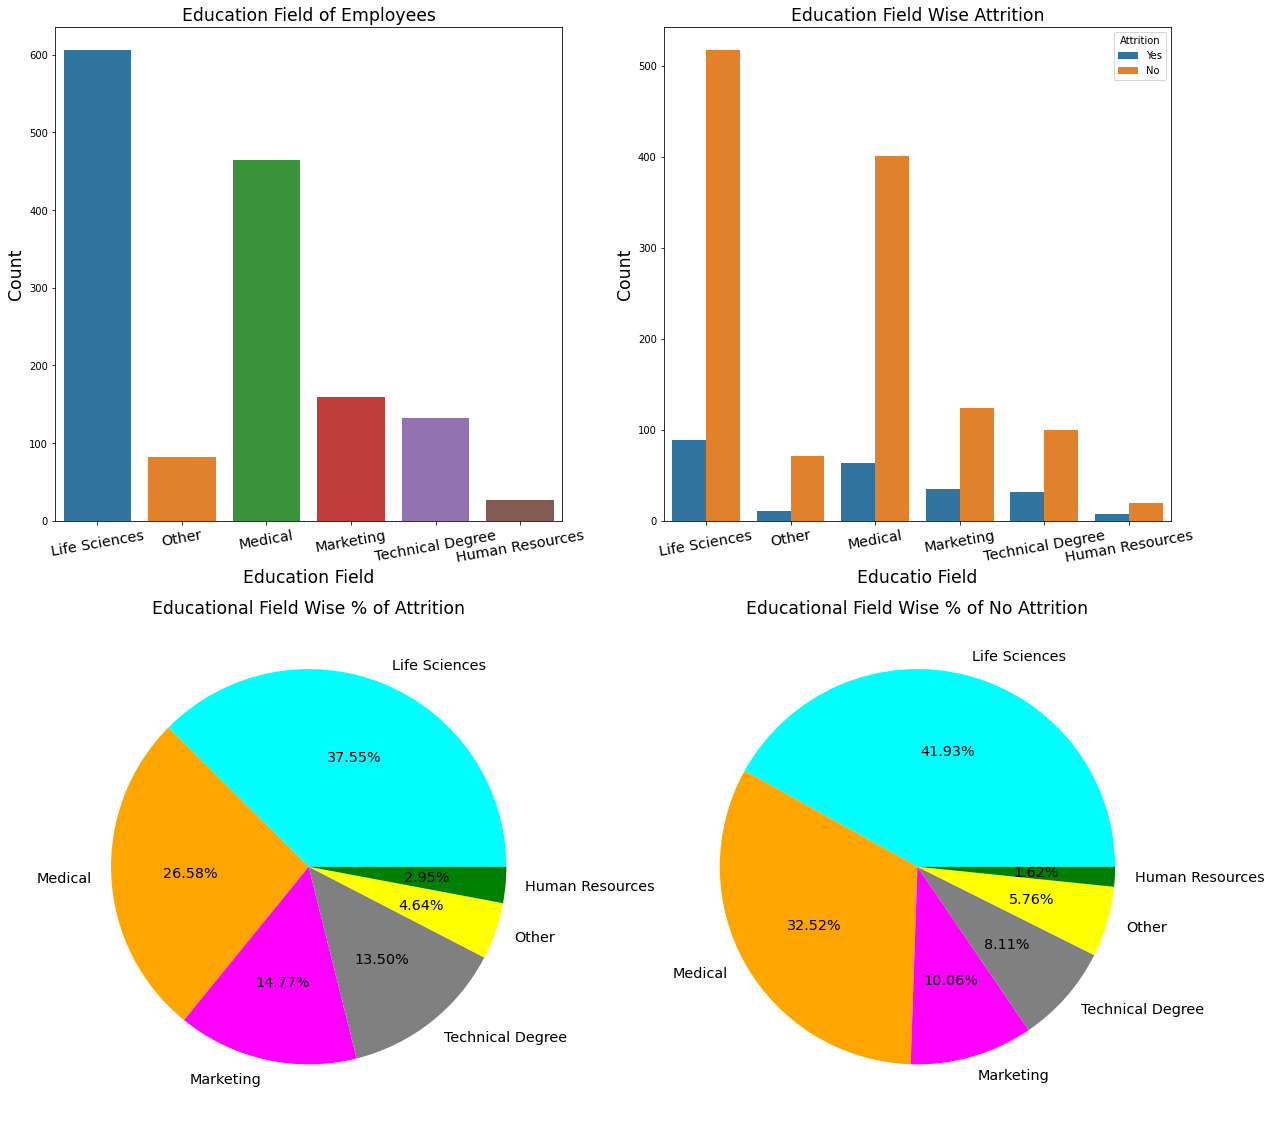

In [31]:
plt.subplots(2,2,figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(x='EducationField',data=df)
plt.title('Education Field of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Education Field',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(rotation=10,fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='EducationField',data=df,hue='Attrition')
plt.title('Education Field Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Educatio Field',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(rotation=10,fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['EducationField'].value_counts(),labels=Attrition_yes['EducationField'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','grey','yellow','green'])
plt.title('Educational Field Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['EducationField'].value_counts(),labels=Attrition_no['EducationField'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','grey','yellow','green'])
plt.title('Educational Field Wise % of No Attrition',fontdict={'fontsize':'xx-large'})


#observation

## Effect of Environment Satisfaction :

In [32]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [33]:
df.groupby('Attrition')['EnvironmentSatisfaction'].value_counts(normalize=True)

Attrition  EnvironmentSatisfaction
No         3                          0.317113
           4                          0.313058
           2                          0.197891
           1                          0.171938
Yes        1                          0.303797
           3                          0.261603
           4                          0.253165
           2                          0.181435
Name: EnvironmentSatisfaction, dtype: float64

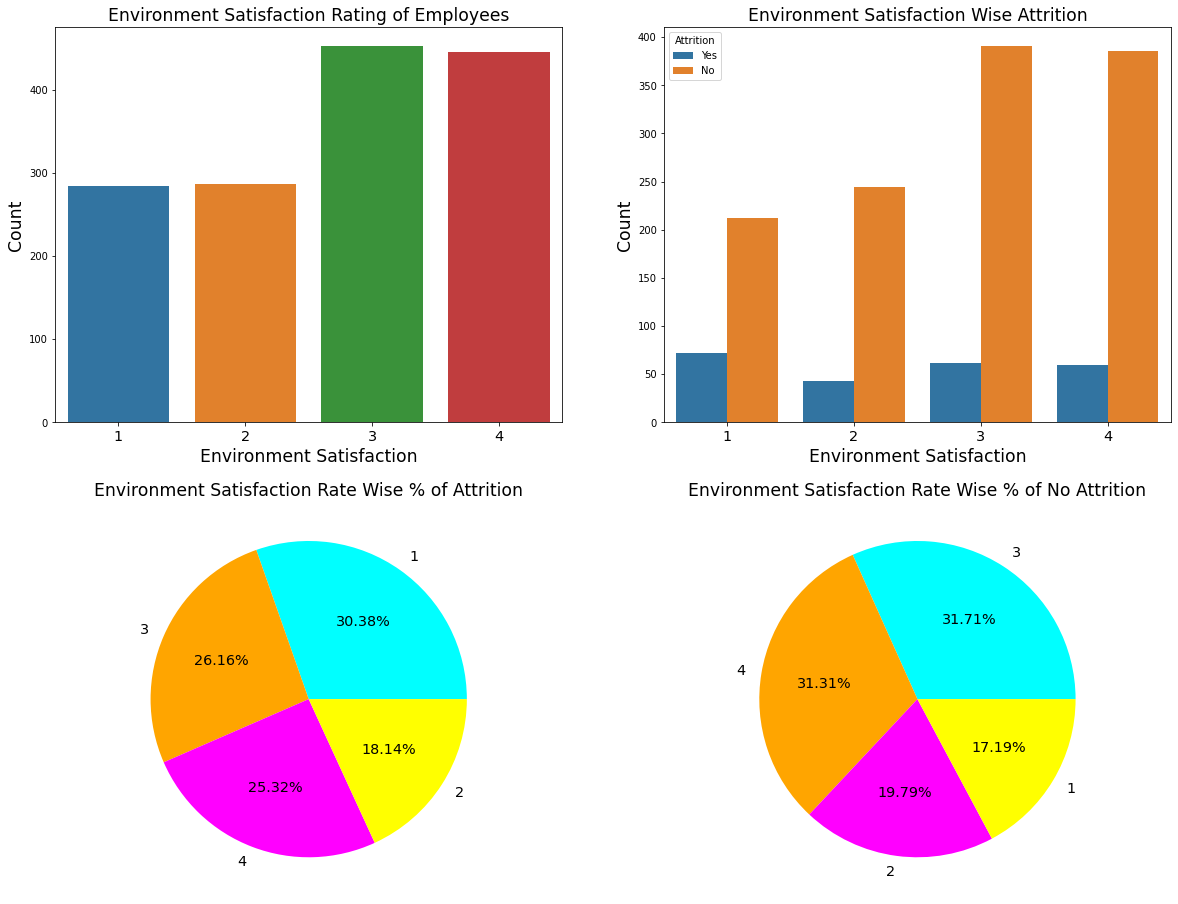

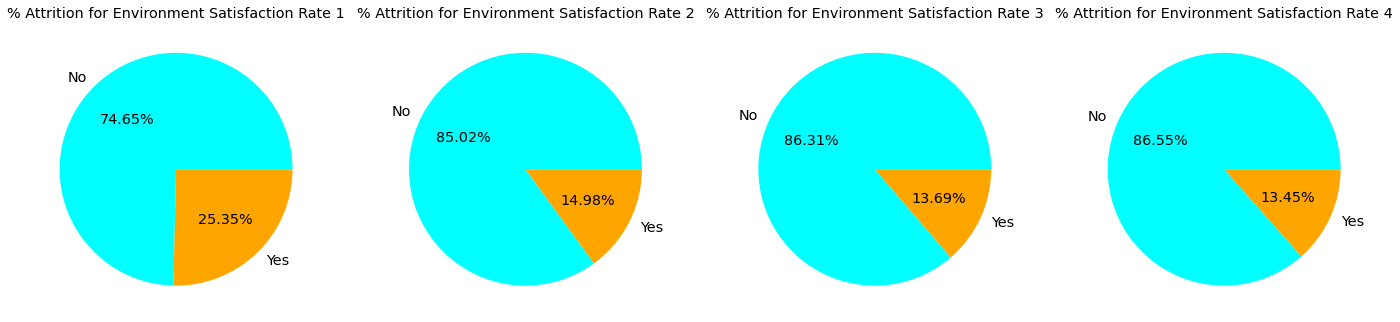

In [34]:
plt.subplots(2,2,figsize=(20,16))

plt.subplot(2,2,1)
sns.countplot(x='EnvironmentSatisfaction',data=df)
plt.title('Environment Satisfaction Rating of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Environment Satisfaction',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='EnvironmentSatisfaction',data=df,hue='Attrition')
plt.title('Environment Satisfaction Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Environment Satisfaction',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['EnvironmentSatisfaction'].value_counts(),labels=Attrition_yes['EnvironmentSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Environment Satisfaction Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['EnvironmentSatisfaction'].value_counts(),labels=Attrition_no['EnvironmentSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Environment Satisfaction Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['EnvironmentSatisfaction']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['EnvironmentSatisfaction']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['EnvironmentSatisfaction']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['EnvironmentSatisfaction']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Environment Satisfaction Rate 4',fontdict={'fontsize':'x-large'})

plt.show()

## Effect of Relationship Satisfaction :

In [35]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

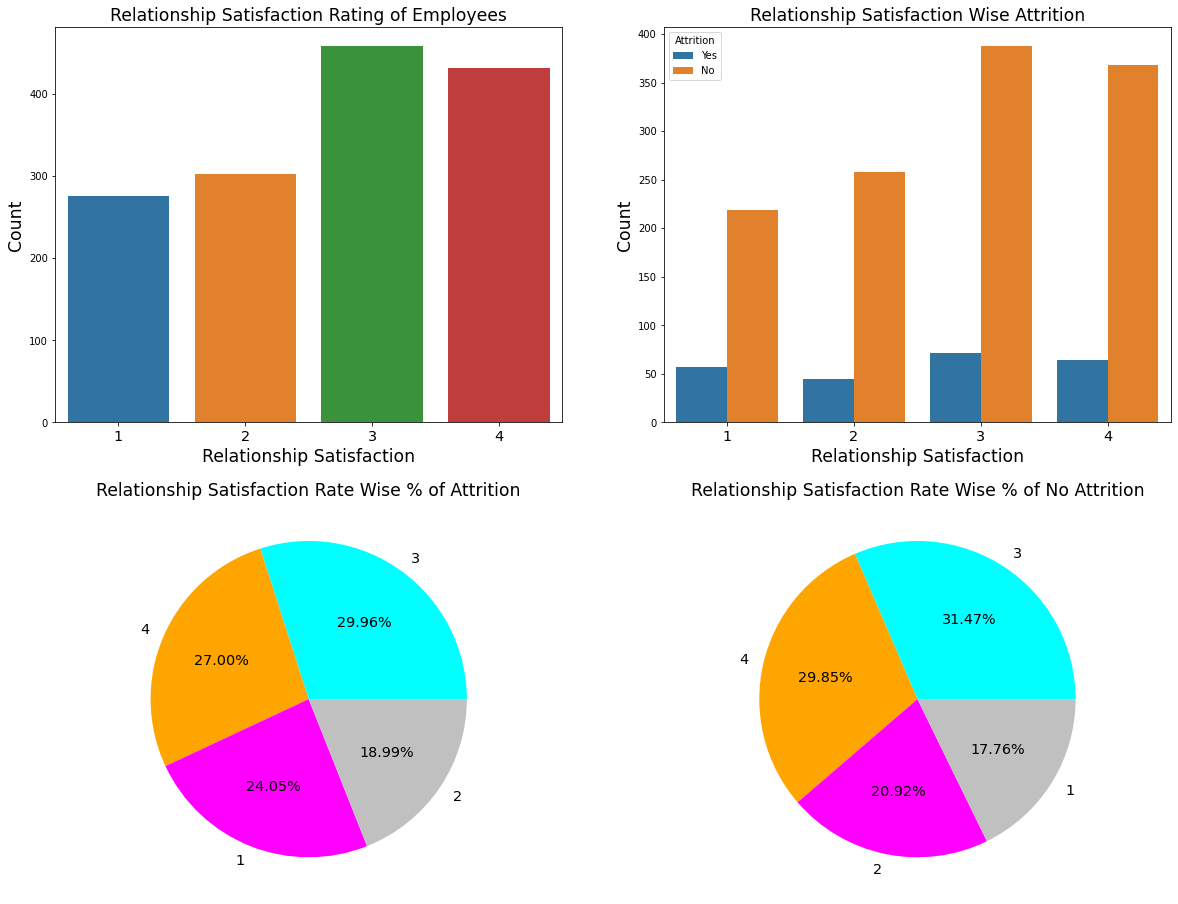

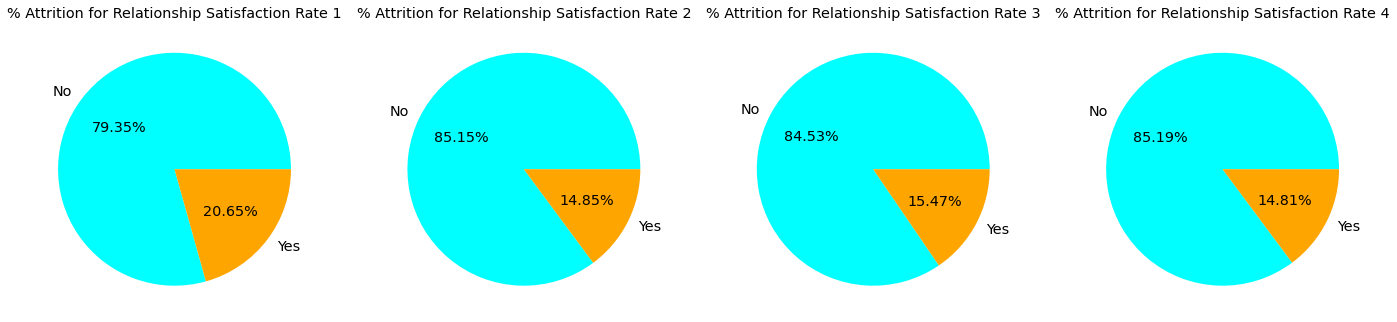

In [36]:
plt.subplots(2,2,figsize=(20,16))

plt.subplot(2,2,1)
sns.countplot(x='RelationshipSatisfaction',data=df)
plt.title('Relationship Satisfaction Rating of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Relationship Satisfaction',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='RelationshipSatisfaction',data=df,hue='Attrition')
plt.title('Relationship Satisfaction Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Relationship Satisfaction',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['RelationshipSatisfaction'].value_counts(),labels=Attrition_yes['RelationshipSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','silver'])
plt.title('Relationship Satisfaction Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['RelationshipSatisfaction'].value_counts(),labels=Attrition_no['RelationshipSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','silver'])
plt.title('Relationship Satisfaction Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['RelationshipSatisfaction']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Relationship Satisfaction Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['RelationshipSatisfaction']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Relationship Satisfaction Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['RelationshipSatisfaction']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Relationship Satisfaction Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['RelationshipSatisfaction']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Relationship Satisfaction Rate 4',fontdict={'fontsize':'x-large'})

plt.show()

#observation:-

## Effect of Job Involvement :

In [37]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

Text(0.5, 1.0, '% of Attrition w.r.t Job Involvement Rate 4')

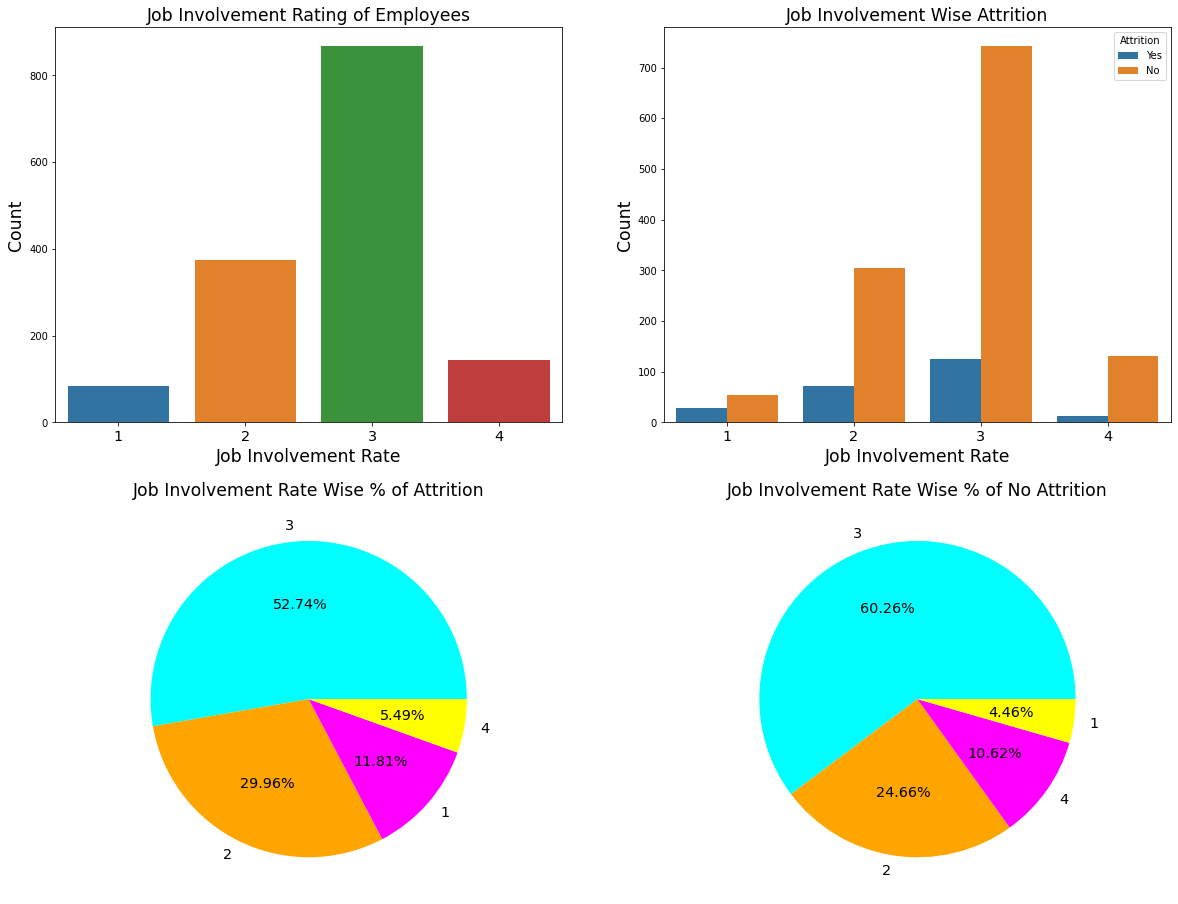

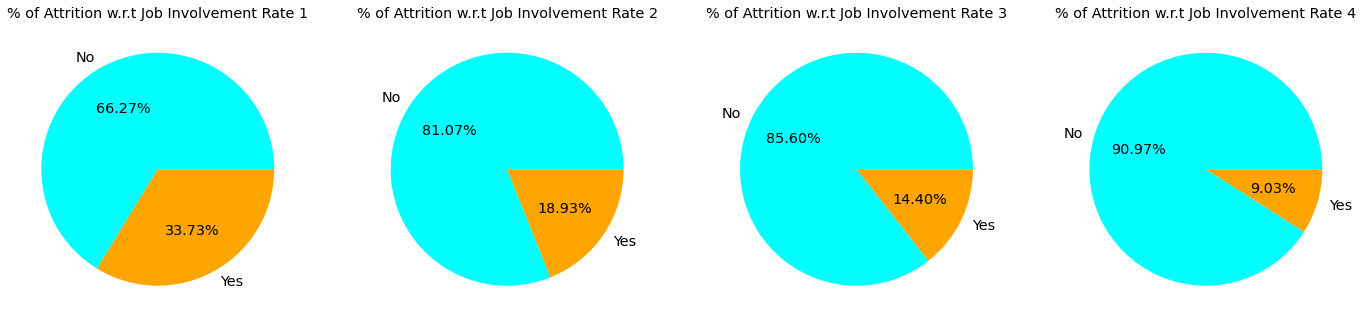

In [38]:
plt.subplots(2,2,figsize=(20,16))

plt.subplot(2,2,1)
sns.countplot(x='JobInvolvement',data=df)
plt.title('Job Involvement Rating of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Involvement Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='JobInvolvement',data=df,hue='Attrition')
plt.title('Job Involvement Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Involvement Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['JobInvolvement'].value_counts(),labels=Attrition_yes['JobInvolvement'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Job Involvement Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['JobInvolvement'].value_counts(),labels=Attrition_no['JobInvolvement'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Job Involvement Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['JobInvolvement']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Involvement Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['JobInvolvement']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Involvement Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['JobInvolvement']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Involvement Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['JobInvolvement']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Involvement Rate 4',fontdict={'fontsize':'x-large'})


#observation

## Effect of Job Role :

In [39]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [40]:
df['JobRole'].value_counts(normalize=True)*100

Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: JobRole, dtype: float64

In [41]:
df.groupby('JobRole')['Attrition'].value_counts(normalize=True)*100

JobRole                    Attrition
Healthcare Representative  No           93.129771
                           Yes           6.870229
Human Resources            No           76.923077
                           Yes          23.076923
Laboratory Technician      No           76.061776
                           Yes          23.938224
Manager                    No           95.098039
                           Yes           4.901961
Manufacturing Director     No           93.103448
                           Yes           6.896552
Research Director          No           97.500000
                           Yes           2.500000
Research Scientist         No           83.904110
                           Yes          16.095890
Sales Executive            No           82.515337
                           Yes          17.484663
Sales Representative       No           60.240964
                           Yes          39.759036
Name: Attrition, dtype: float64

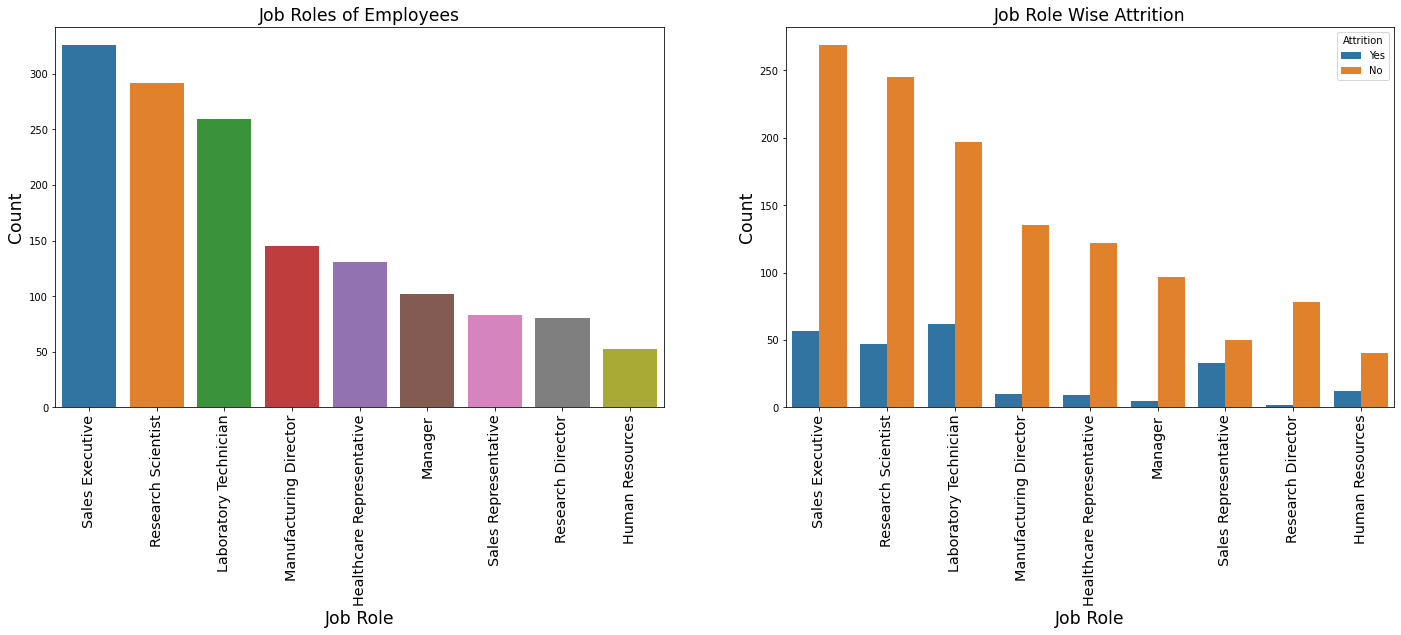

In [43]:
plt.subplots(1,2,figsize=(24,7))

plt.subplot(1,2,1)
sns.countplot(x='JobRole',data=df)
plt.title('Job Roles of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Role',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(rotation=90,fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='JobRole',data=df,hue='Attrition')
plt.title('Job Role Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Role',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(rotation=90,fontsize='x-large')

plt.show()

#observation

Text(0.5, 1.0, 'Job Role Wise % of No Attrition')

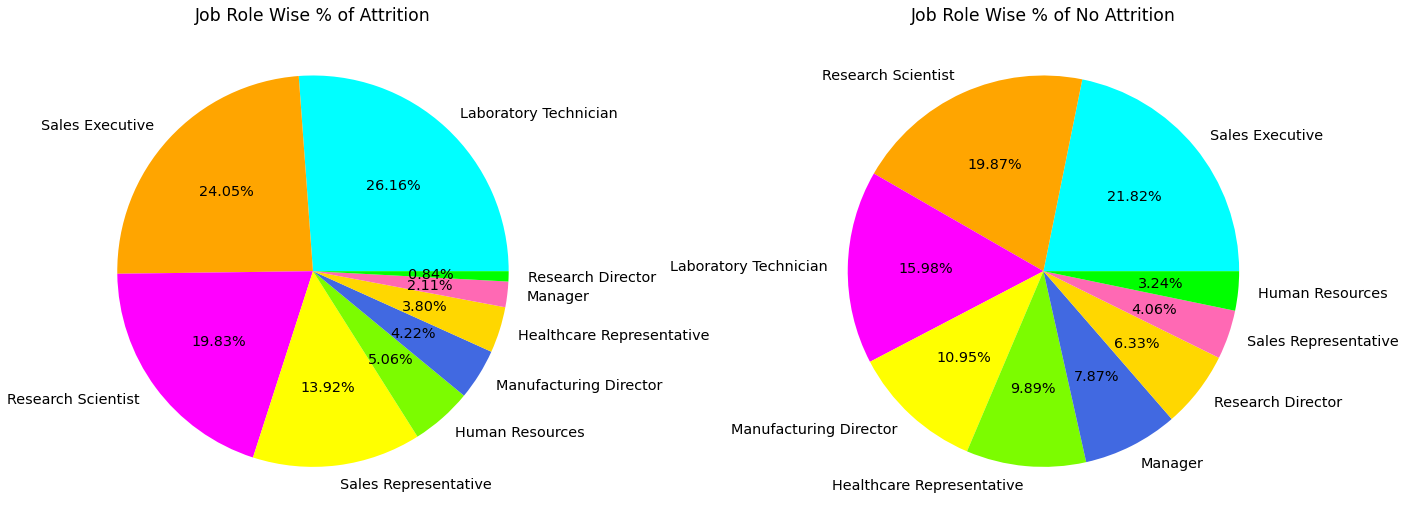

In [44]:
plt.subplots(1,2,figsize=(24,9))

plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['JobRole'].value_counts(),labels=Attrition_yes['JobRole'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','lawngreen','royalblue','gold','hotpink','lime'])
plt.title('Job Role Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['JobRole'].value_counts(),labels=Attrition_no['JobRole'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','lawngreen','royalblue','gold','hotpink','lime'])
plt.title('Job Role Wise % of No Attrition',fontdict={'fontsize':'xx-large'})


## Effect of Job Satisfaction :

In [45]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [46]:
df['JobSatisfaction'].value_counts(normalize=True)*100

4    31.224490
3    30.068027
1    19.659864
2    19.047619
Name: JobSatisfaction, dtype: float64

Text(0.5, 1.0, '% of Attrition w.r.t Job Satisfaction Rate 4')

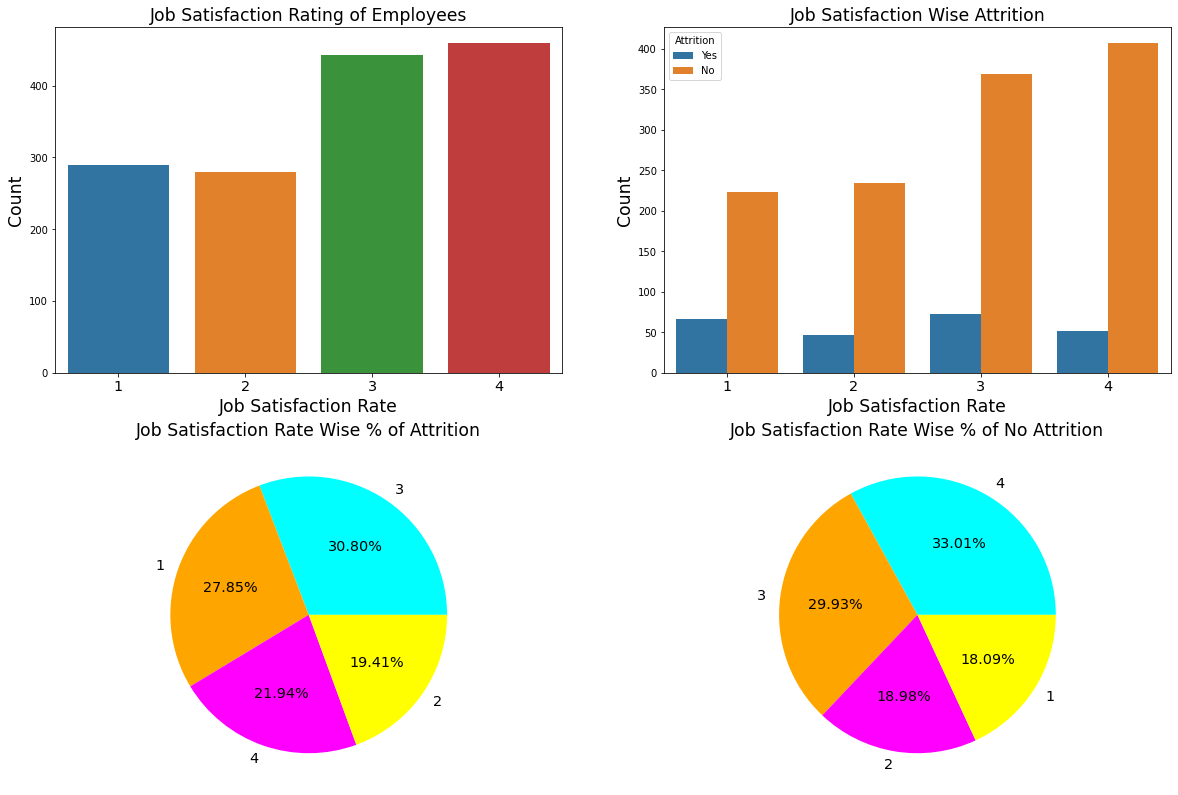

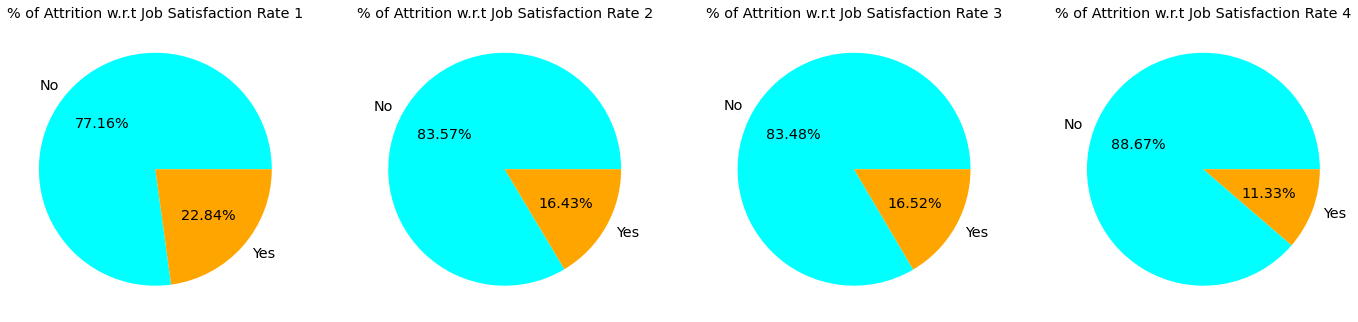

In [47]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='JobSatisfaction',data=df)
plt.title('Job Satisfaction Rating of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Satisfaction Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='JobSatisfaction',data=df,hue='Attrition')
plt.title('Job Satisfaction Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Satisfaction Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['JobSatisfaction'].value_counts(),labels=Attrition_yes['JobSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Job Satisfaction Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['JobSatisfaction'].value_counts(),labels=Attrition_no['JobSatisfaction'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('Job Satisfaction Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['JobSatisfaction']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Satisfaction Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['JobSatisfaction']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Satisfaction Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['JobSatisfaction']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Satisfaction Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['JobSatisfaction']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Satisfaction Rate 4',fontdict={'fontsize':'x-large'})


## Effect of Job Level :

In [48]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

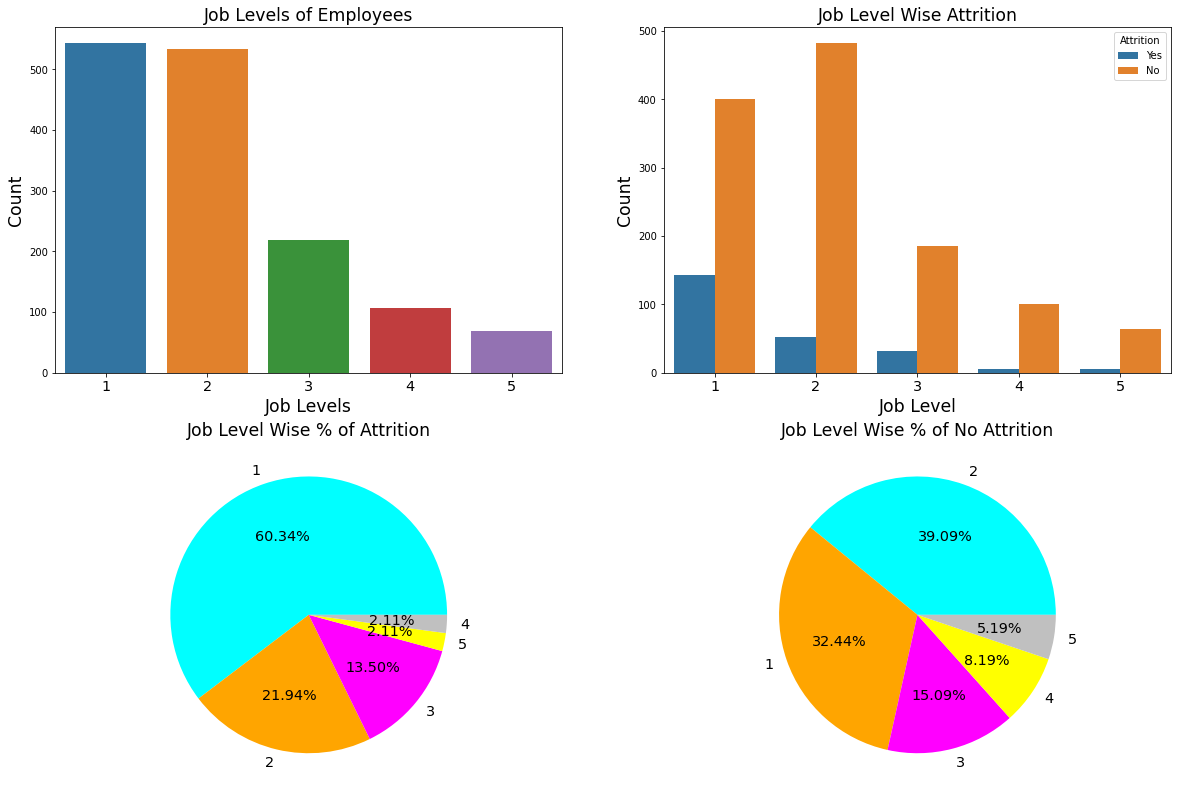

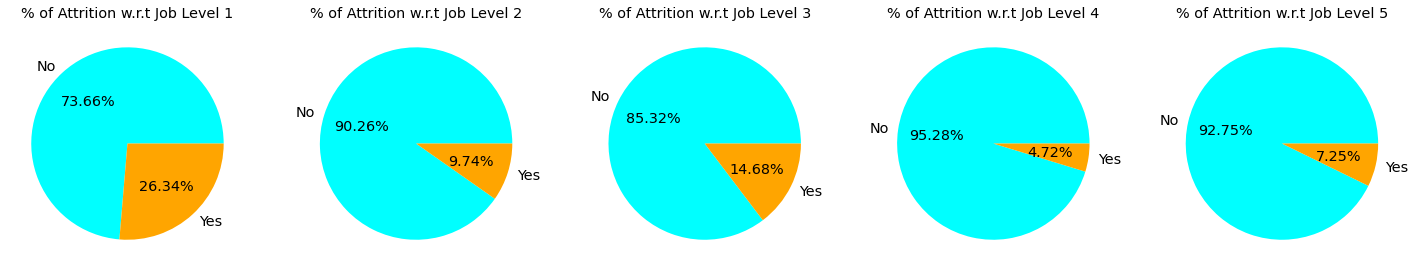

In [49]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='JobLevel',data=df)
plt.title('Job Levels of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Levels',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='JobLevel',data=df,hue='Attrition')
plt.title('Job Level Wise Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Job Level',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['JobLevel'].value_counts(),labels=Attrition_yes['JobLevel'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Job Level Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['JobLevel'].value_counts(),labels=Attrition_no['JobLevel'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Job Level Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,5,figsize=(25,10))

plt.subplot(1,5,1)
plt.pie(df[df['JobLevel']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Level 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,2)
plt.pie(df[df['JobLevel']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Level 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,3)
plt.pie(df[df['JobLevel']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Level 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,4)
plt.pie(df[df['JobLevel']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Level 4',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,5)
plt.pie(df[df['JobLevel']==5]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Job Level 5',fontdict={'fontsize':'x-large'})

plt.show()

## Effect of Work Life Balance :

In [50]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

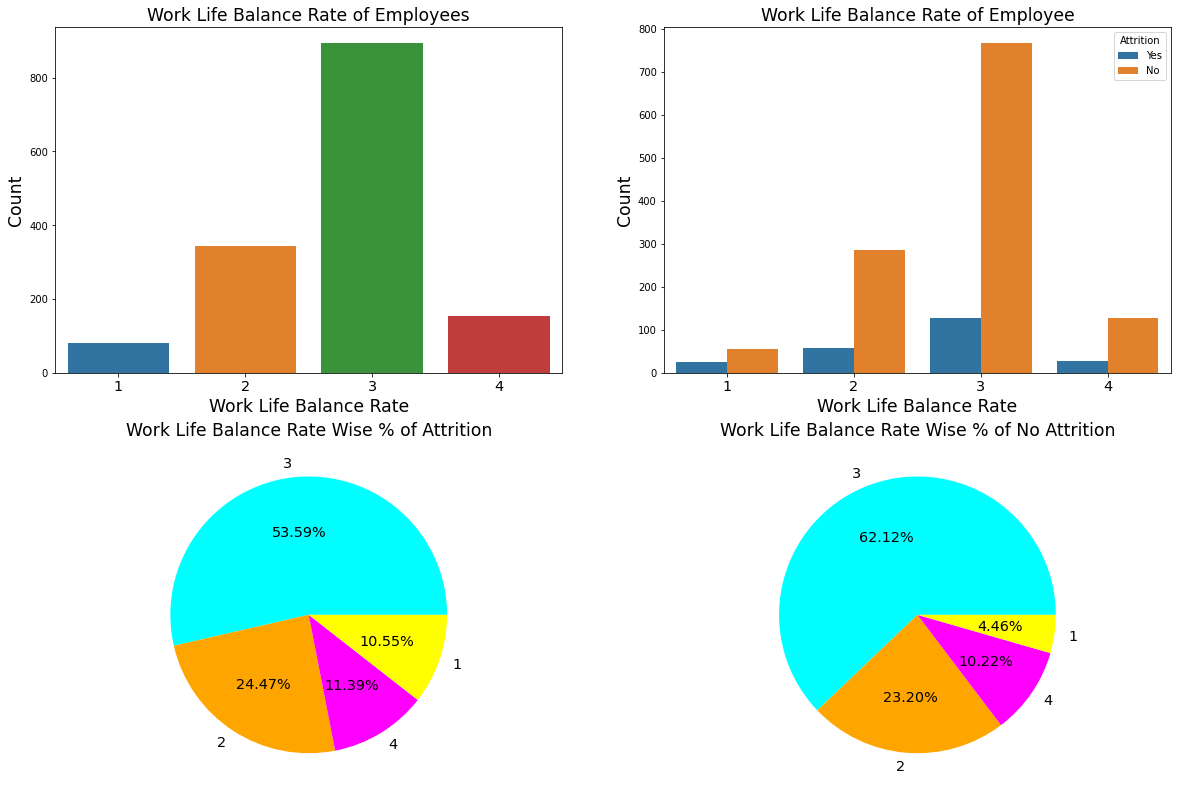

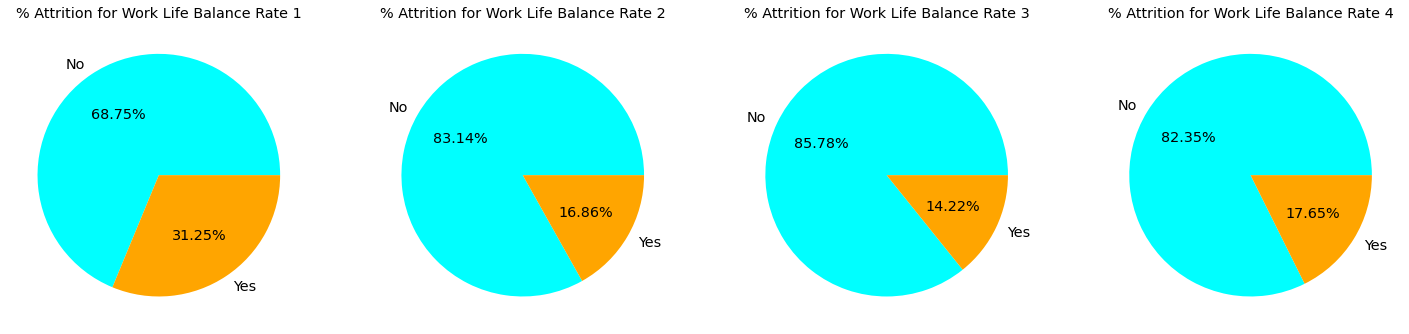

In [51]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='WorkLifeBalance',data=df)
plt.title('Work Life Balance Rate of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Work Life Balance Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='WorkLifeBalance',data=df,hue='Attrition')
plt.title('Work Life Balance Rate of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Work Life Balance Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['WorkLifeBalance'].value_counts(),labels=Attrition_yes['WorkLifeBalance'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Work Life Balance Rate Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['WorkLifeBalance'].value_counts(),labels=Attrition_no['WorkLifeBalance'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Work Life Balance Rate Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(25,10))

plt.subplot(1,4,1)
plt.pie(df[df['WorkLifeBalance']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Work Life Balance Rate 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['WorkLifeBalance']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Work Life Balance Rate 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['WorkLifeBalance']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Work Life Balance Rate 3',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['WorkLifeBalance']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition for Work Life Balance Rate 4',fontdict={'fontsize':'x-large'})

plt.show()

## Training Times Last Year :

In [52]:
df['TrainingTimesLastYear'].value_counts(normalize=True)*100

2    37.210884
3    33.401361
4     8.367347
5     8.095238
1     4.829932
6     4.421769
0     3.673469
Name: TrainingTimesLastYear, dtype: float64

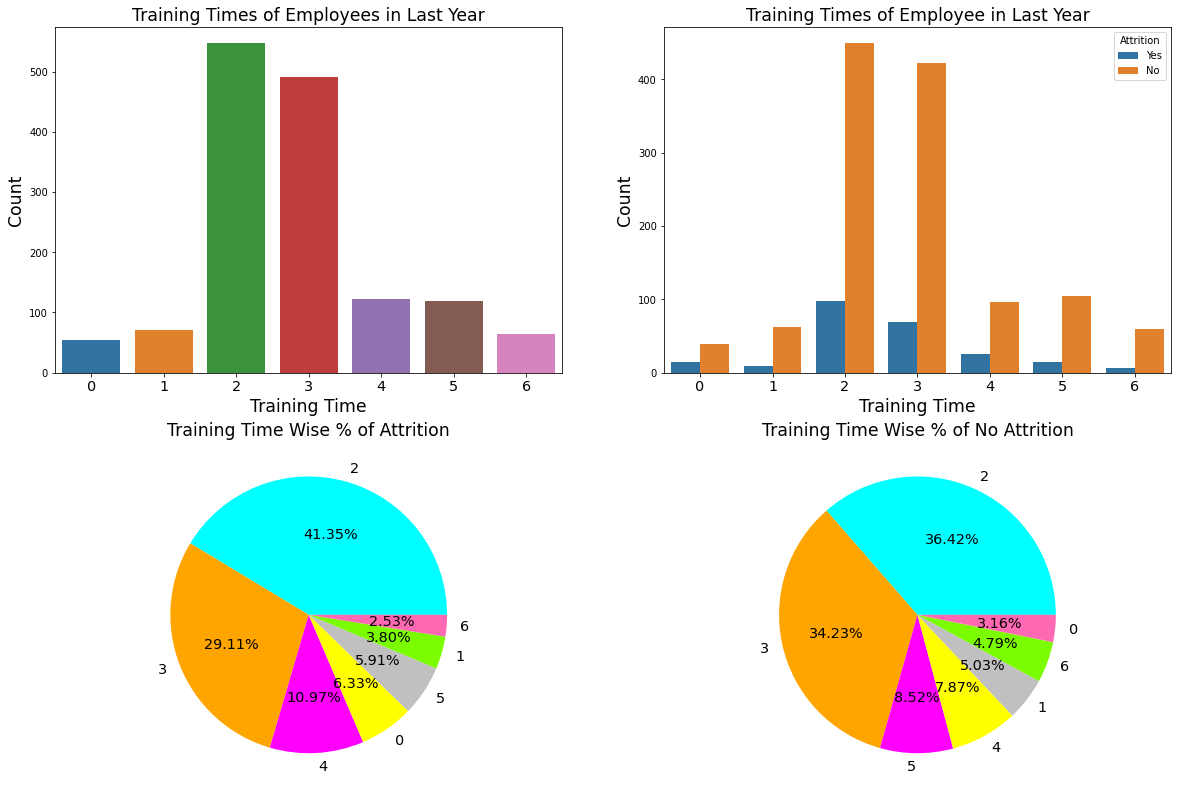

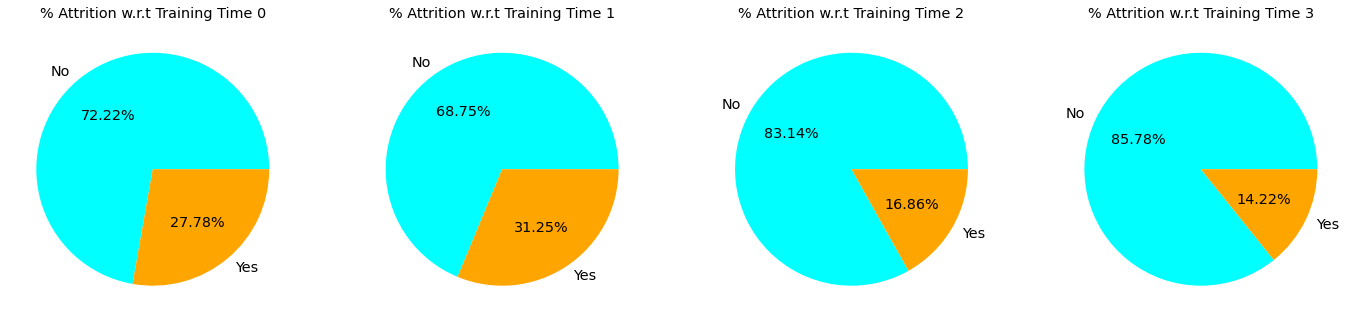

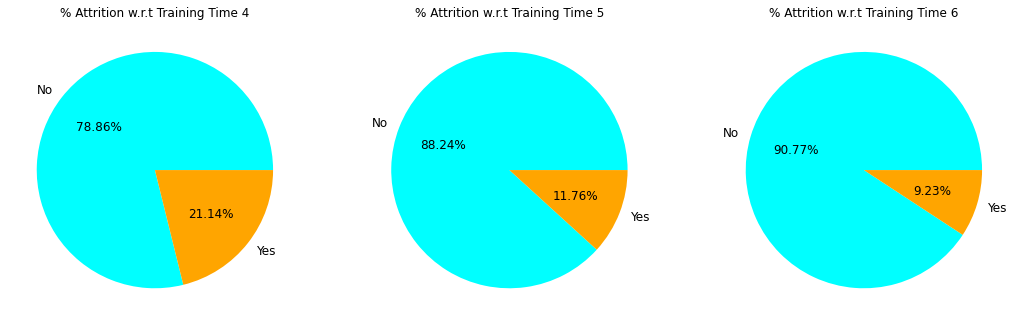

In [53]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='TrainingTimesLastYear',data=df)
plt.title('Training Times of Employees in Last Year',fontdict={'fontsize':'xx-large'})
plt.xlabel('Training Time',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='TrainingTimesLastYear',data=df,hue='Attrition')
plt.title('Training Times of Employee in Last Year',fontdict={'fontsize':'xx-large'})
plt.xlabel('Training Time',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['TrainingTimesLastYear'].value_counts(),labels=Attrition_yes['TrainingTimesLastYear'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver','lawngreen','hotpink'])
plt.title('Training Time Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['TrainingTimesLastYear'].value_counts(),labels=Attrition_no['TrainingTimesLastYear'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver','lawngreen','hotpink'])
plt.title('Training Time Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
plt.pie(df[df['TrainingTimesLastYear']==0]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 0',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['WorkLifeBalance']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['WorkLifeBalance']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['WorkLifeBalance']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 3',fontdict={'fontsize':'x-large'})

plt.subplots(1,3,figsize=(18,10))

plt.subplot(1,3,1)
plt.pie(df[df['TrainingTimesLastYear']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 4',fontdict={'fontsize':'large'})

plt.subplot(1,3,2)
plt.pie(df[df['TrainingTimesLastYear']==5]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 5',fontdict={'fontsize':'large'})

plt.subplot(1,3,3)
plt.pie(df[df['TrainingTimesLastYear']==6]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Training Time 6',fontdict={'fontsize':'large'})

plt.show()

## Effect of Gender :

In [54]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

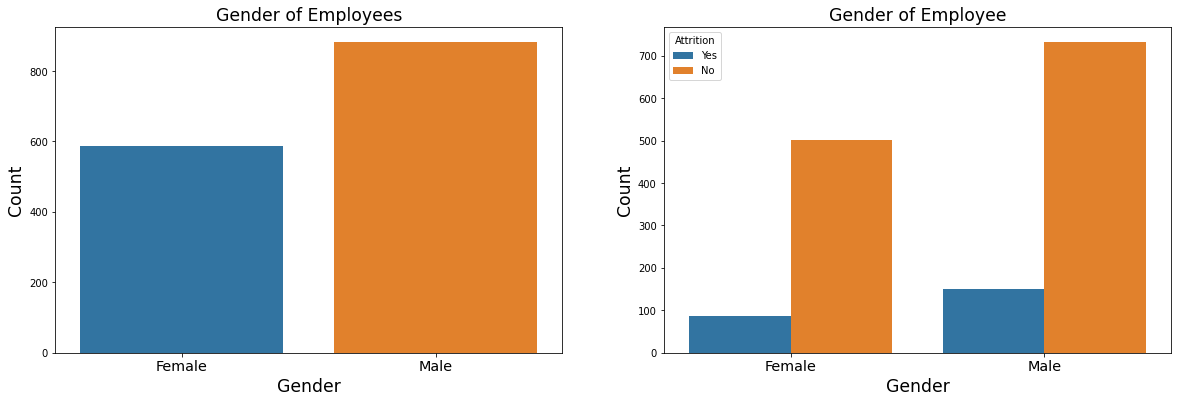

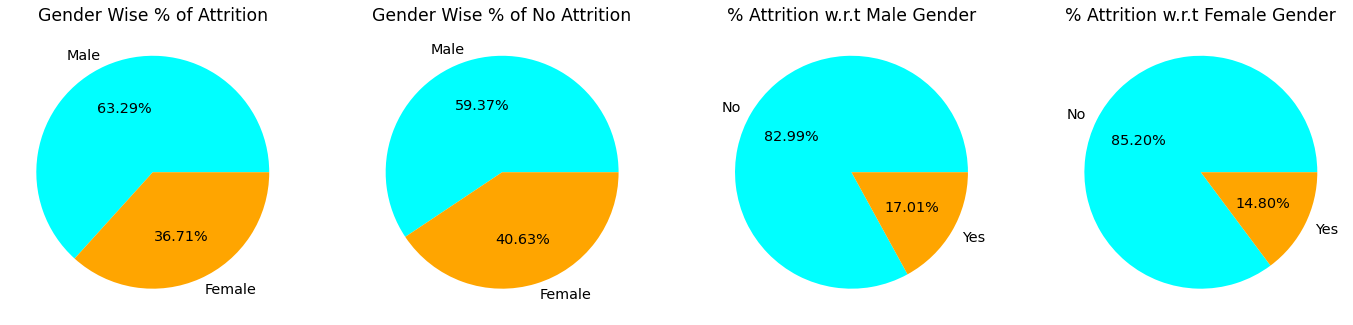

In [55]:
plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='Gender',data=df)
plt.title('Gender of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Gender',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='Gender',data=df,hue='Attrition')
plt.title('Gender of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Gender',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplots(1,4,figsize=(24,7))

plt.subplot(1,4,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['Gender'].value_counts(),labels=Attrition_yes['Gender'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('Gender Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['Gender'].value_counts(),labels=Attrition_no['Gender'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('Gender Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,3)
plt.pie(df[df['Gender']=='Male']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Male Gender',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,4)
plt.pie(df[df['Gender']=='Female']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Female Gender',fontdict={'fontsize':'xx-large'})

plt.show()

## Effect of Marital Status :

In [56]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

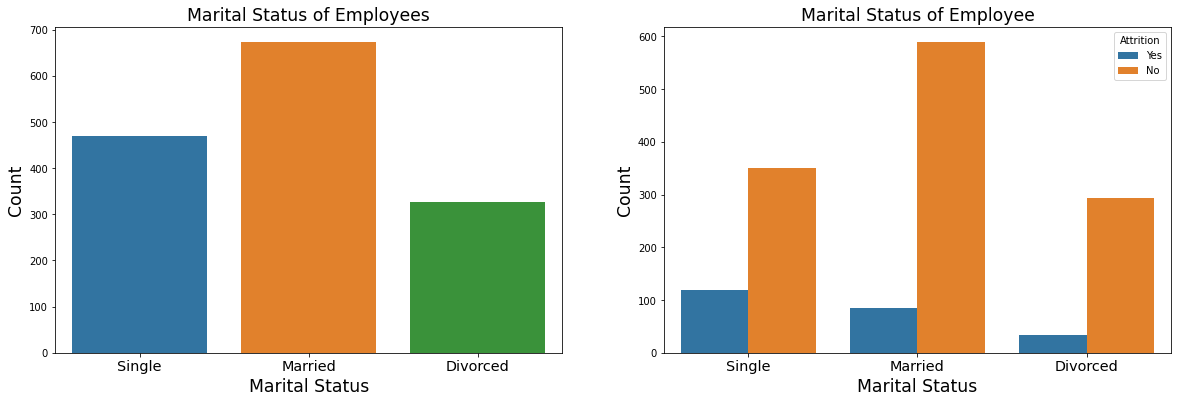

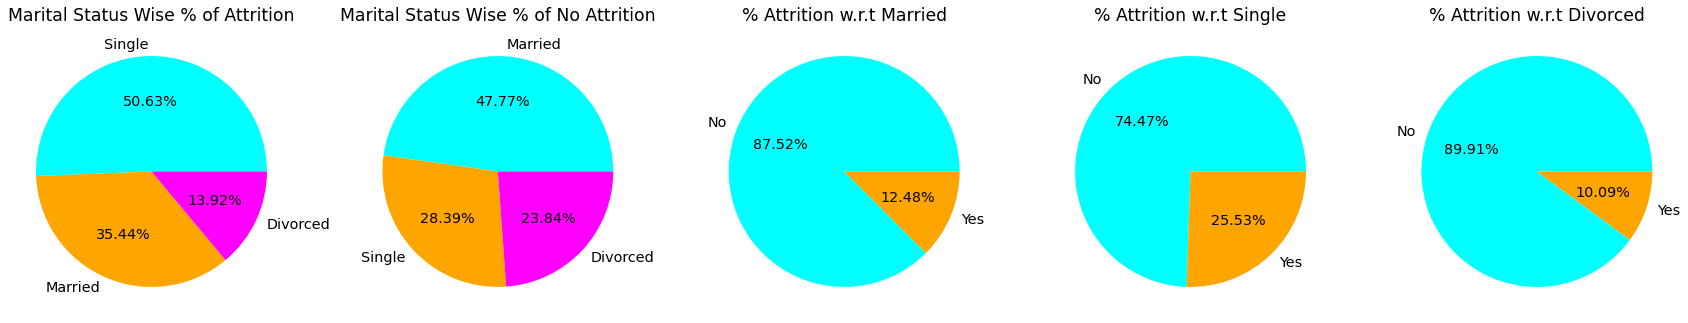

In [57]:
plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='MaritalStatus',data=df)
plt.title('Marital Status of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Marital Status',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='MaritalStatus',data=df,hue='Attrition')
plt.title('Marital Status of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Marital Status',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplots(1,5,figsize=(30,8))

plt.subplot(1,5,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['MaritalStatus'].value_counts(),labels=Attrition_yes['MaritalStatus'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Marital Status Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,5,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['MaritalStatus'].value_counts(),labels=Attrition_no['MaritalStatus'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Marital Status Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,5,3)
plt.pie(df[df['MaritalStatus']=='Married']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Married',fontdict={'fontsize':'xx-large'})

plt.subplot(1,5,4)
plt.pie(df[df['MaritalStatus']=='Single']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Single',fontdict={'fontsize':'xx-large'})

plt.subplot(1,5,5)
plt.pie(df[df['MaritalStatus']=='Divorced']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Divorced',fontdict={'fontsize':'xx-large'})

plt.show()

## Effect of Stock Option Level :

In [58]:
df['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

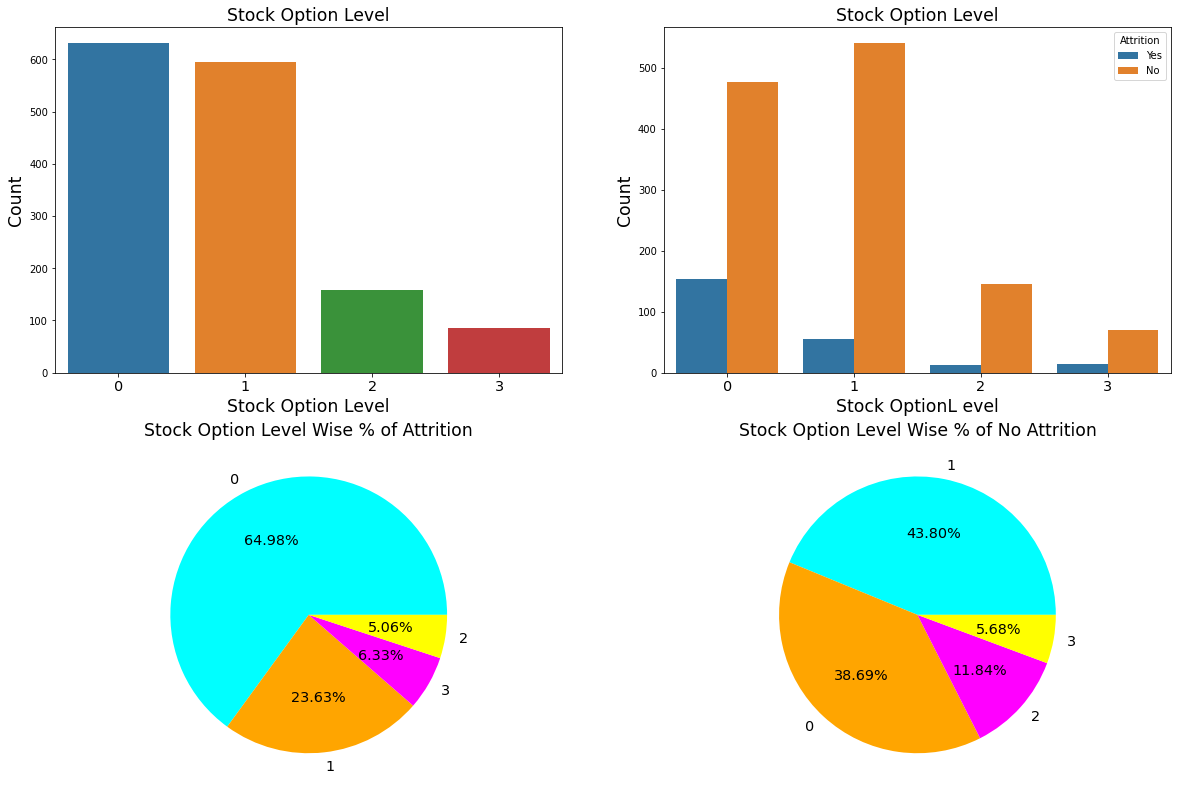

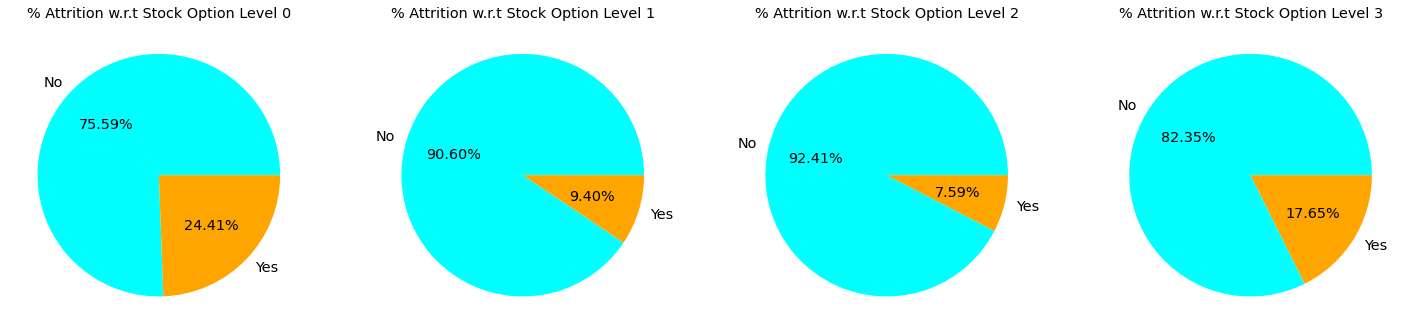

In [59]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='StockOptionLevel',data=df)
plt.title('Stock Option Level',fontdict={'fontsize':'xx-large'})
plt.xlabel('Stock Option Level',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='StockOptionLevel',data=df,hue='Attrition')
plt.title('Stock Option Level',fontdict={'fontsize':'xx-large'})
plt.xlabel('Stock OptionL evel',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['StockOptionLevel'].value_counts(),labels=Attrition_yes['StockOptionLevel'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Stock Option Level Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['StockOptionLevel'].value_counts(),labels=Attrition_no['StockOptionLevel'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow','silver'])
plt.title('Stock Option Level Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplots(1,4,figsize=(25,10))

plt.subplot(1,4,1)
plt.pie(df[df['StockOptionLevel']==0]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Stock Option Level 0',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['StockOptionLevel']==1]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Stock Option Level 1',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['StockOptionLevel']==2]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Stock Option Level 2',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['StockOptionLevel']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Stock Option Level 3',fontdict={'fontsize':'x-large'})

plt.show()

## Effect of Over Time :

In [60]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

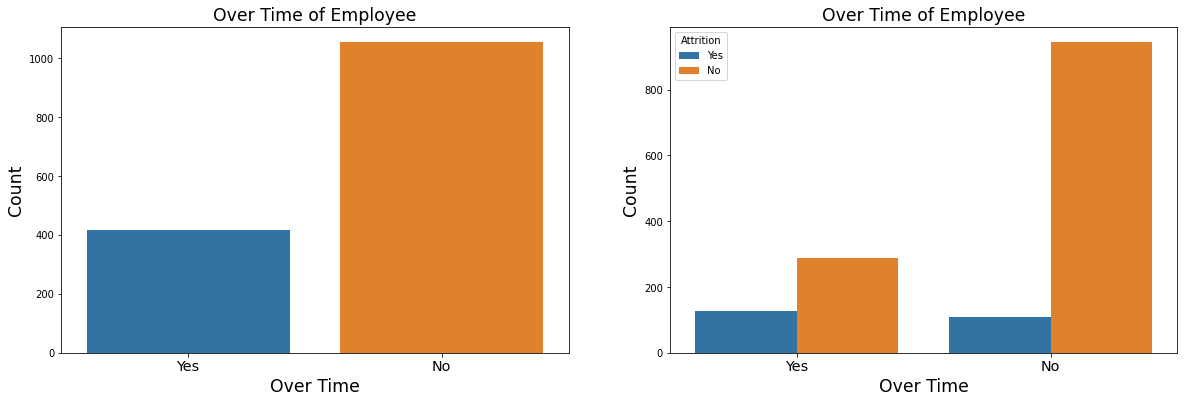

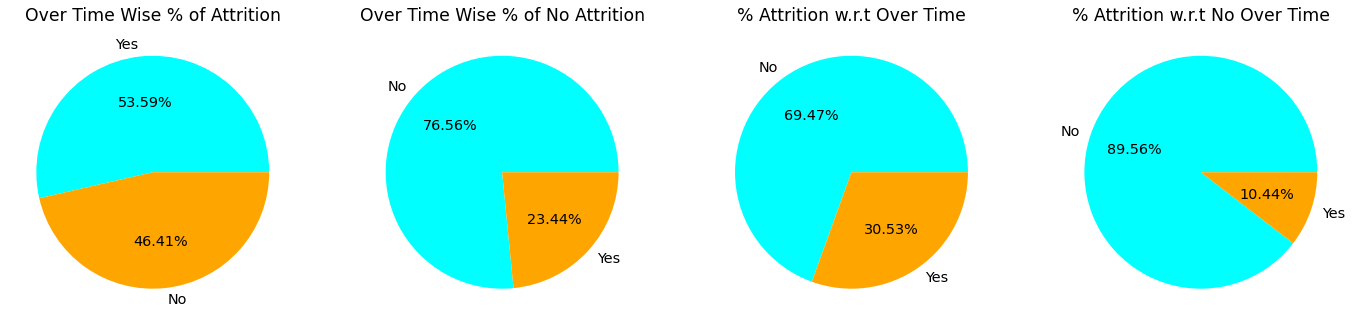

In [61]:
plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='OverTime',data=df)
plt.title('Over Time of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Over Time',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='OverTime',data=df,hue='Attrition')
plt.title('Over Time of Employee',fontdict={'fontsize':'xx-large'})
plt.xlabel('Over Time',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplots(1,4,figsize=(24,10))

plt.subplot(1,4,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['OverTime'].value_counts(),labels=Attrition_yes['OverTime'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('Over Time Wise % of Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['OverTime'].value_counts(),labels=Attrition_no['OverTime'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('Over Time Wise % of No Attrition',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,3)
plt.pie(df[df['OverTime']=='Yes']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t Over Time',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,4)
plt.pie(df[df['OverTime']=='No']['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% Attrition w.r.t No Over Time',fontdict={'fontsize':'xx-large'})

plt.show()

## Columns with Continuous Variables :

In [62]:
df_cont=df[['MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [63]:
df_cont.head()

MonthlyIncome  MonthlyRate  TotalWorkingYears  YearsAtCompany  \
0           5993        19479                  8               6   
1           5130        24907                 10              10   
2           2090         2396                  7               0   
3           2909        23159                  8               8   
4           3468        16632                  6               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

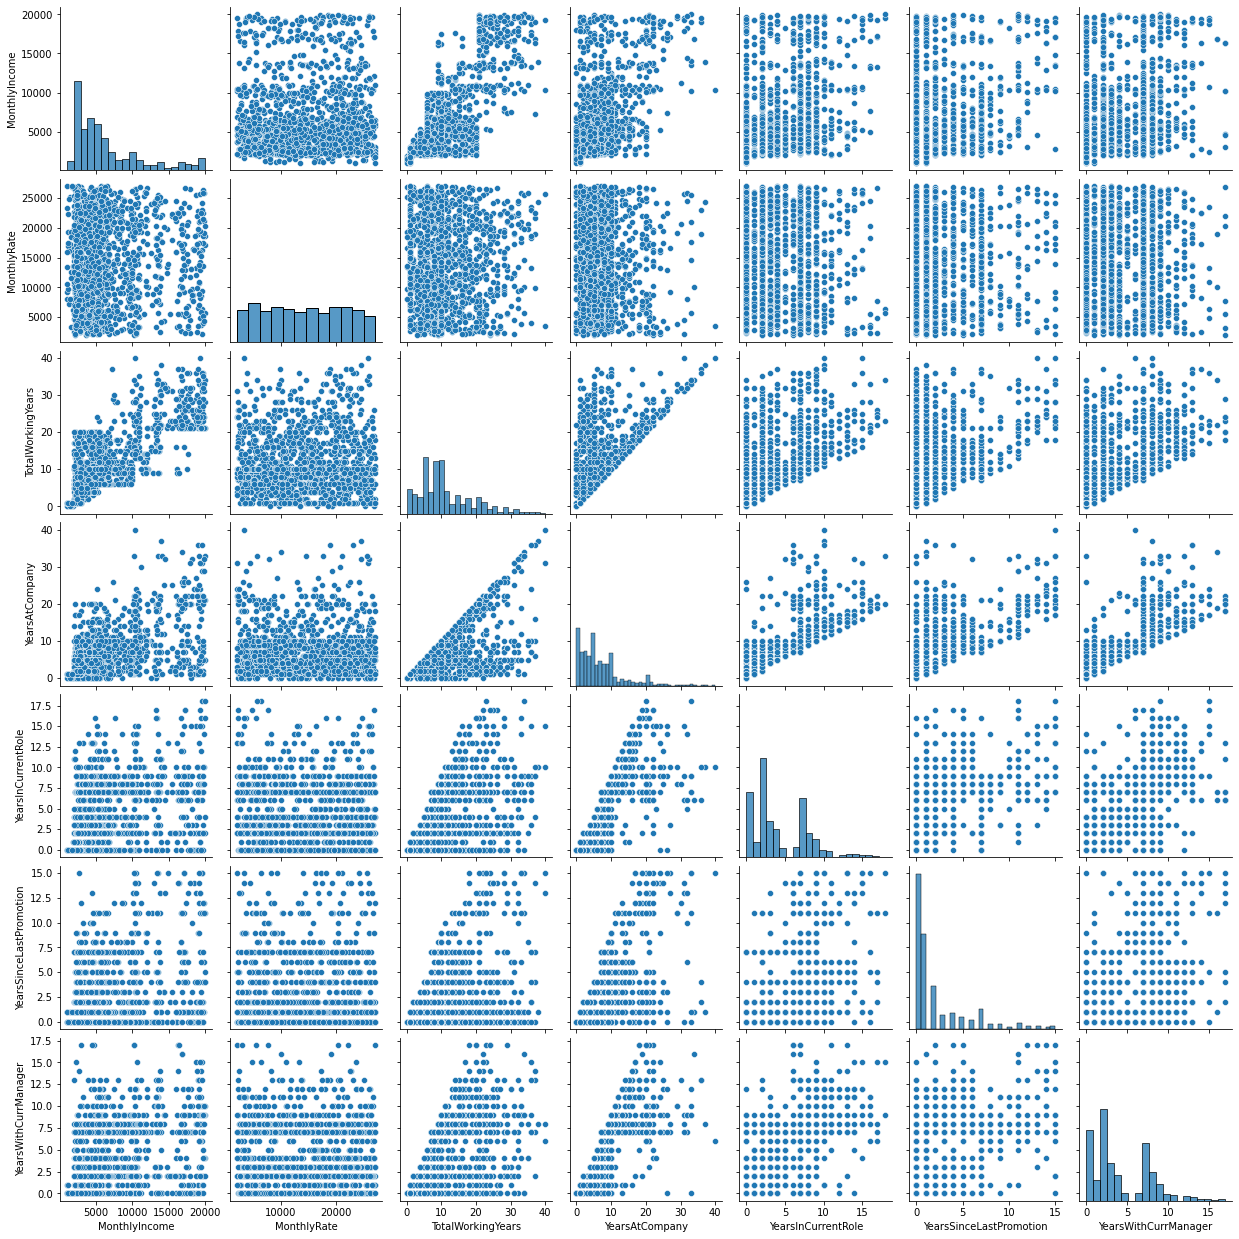

In [64]:
sns.pairplot(df_cont)

<AxesSubplot:>

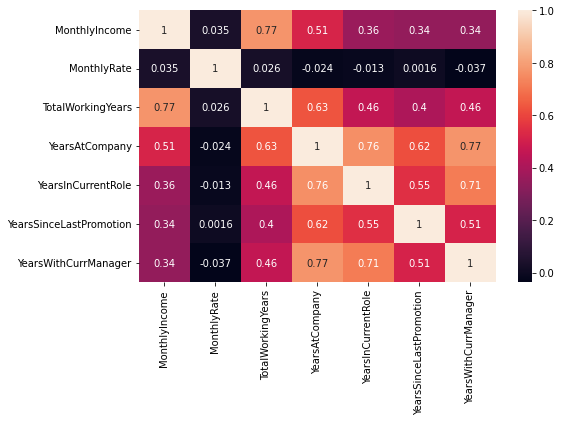

In [65]:
plt.figure(figsize=(8,5))
sns.heatmap(df_cont.corr(),annot=True)

## Effect of Monthly Income and Monthly Rate:

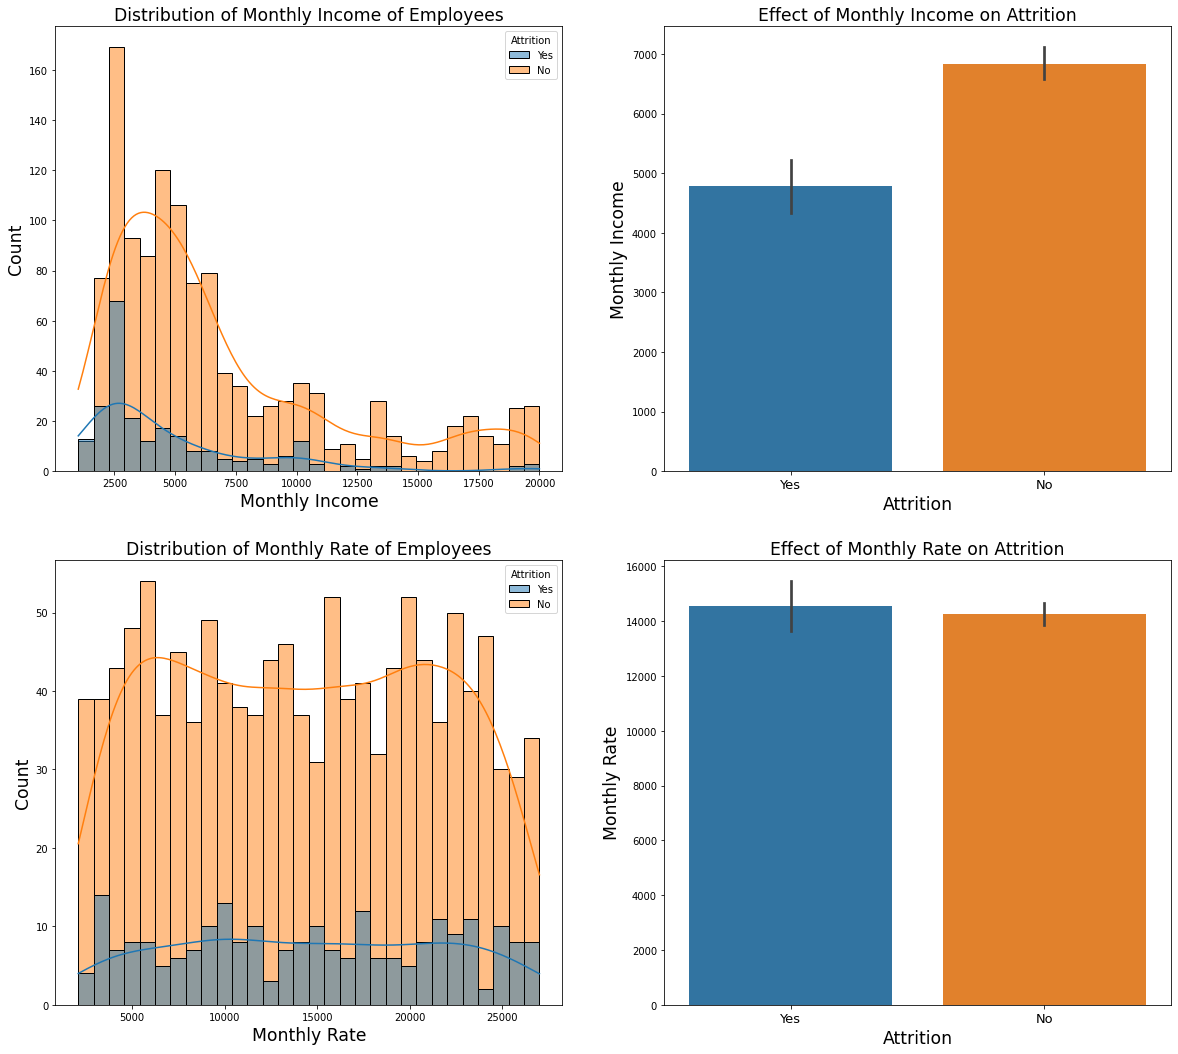

In [66]:
plt.subplots(2,2,figsize=(20,18))

plt.subplot(2,2,1)
sns.histplot(x='MonthlyIncome',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Distribution of Monthly Income of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Monthly Income',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,2)
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.title('Effect of Monthly Income on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Monthly Income',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.subplot(2,2,3)
sns.histplot(x='MonthlyRate',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Distribution of Monthly Rate of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Monthly Rate',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
sns.barplot(x='Attrition',y='MonthlyRate',data=df)
plt.title('Effect of Monthly Rate on Attrition',fontdict={'fontsize':'xx-large'})
plt.xlabel('Attrition',fontdict={'fontsize':'xx-large'})
plt.ylabel('Monthly Rate',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize=13)

plt.show()

## Effect of No. of Companies Worked:

In [67]:
df['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

Text(0.5, 1.0, '% of No Attrition w.r.t No.of Companies Worked')

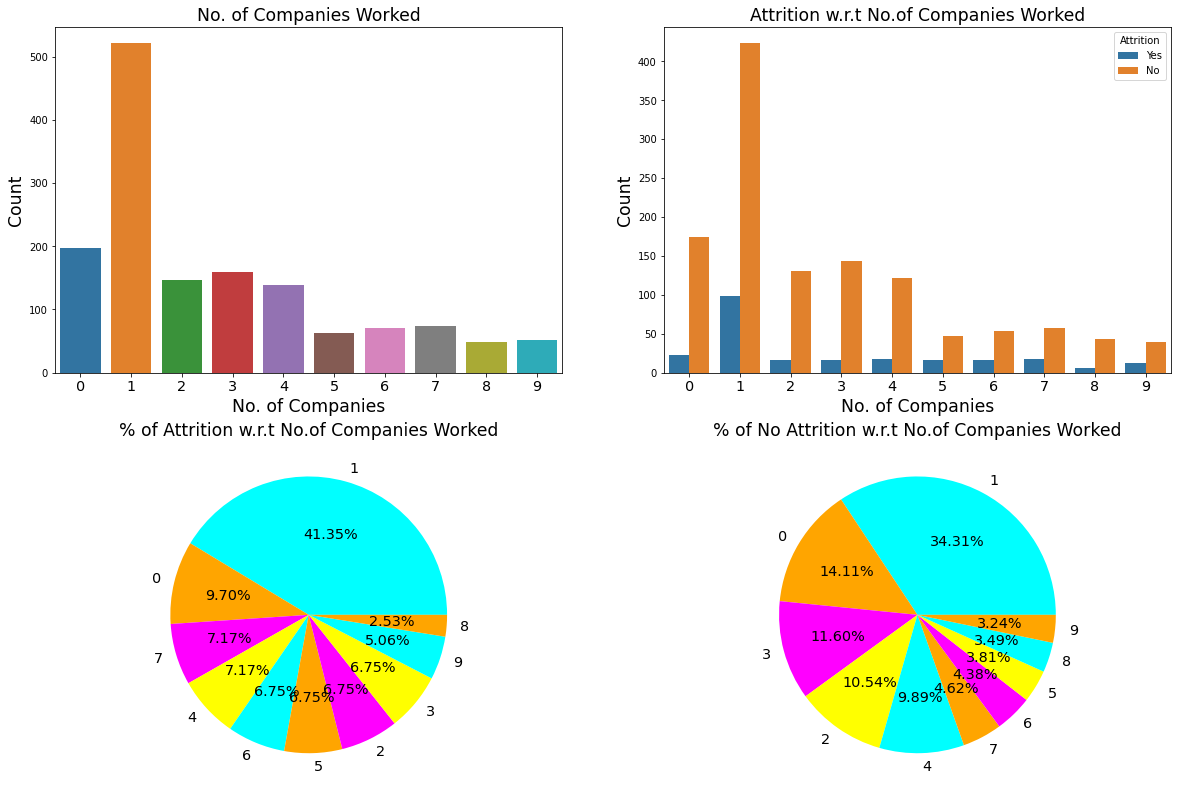

In [68]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(x='NumCompaniesWorked',data=df)
plt.title('No. of Companies Worked',fontdict={'fontsize':'xx-large'})
plt.xlabel('No. of Companies',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,2)
sns.countplot(x='NumCompaniesWorked',data=df,hue='Attrition')
plt.title('Attrition w.r.t No.of Companies Worked',fontdict={'fontsize':'xx-large'})
plt.xlabel('No. of Companies',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(2,2,3)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['NumCompaniesWorked'].value_counts(),labels=Attrition_yes['NumCompaniesWorked'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('% of Attrition w.r.t No.of Companies Worked',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['NumCompaniesWorked'].value_counts(),labels=Attrition_no['NumCompaniesWorked'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta','yellow'])
plt.title('% of No Attrition w.r.t No.of Companies Worked',fontdict={'fontsize':'xx-large'})


## Effect of Total Working Years :

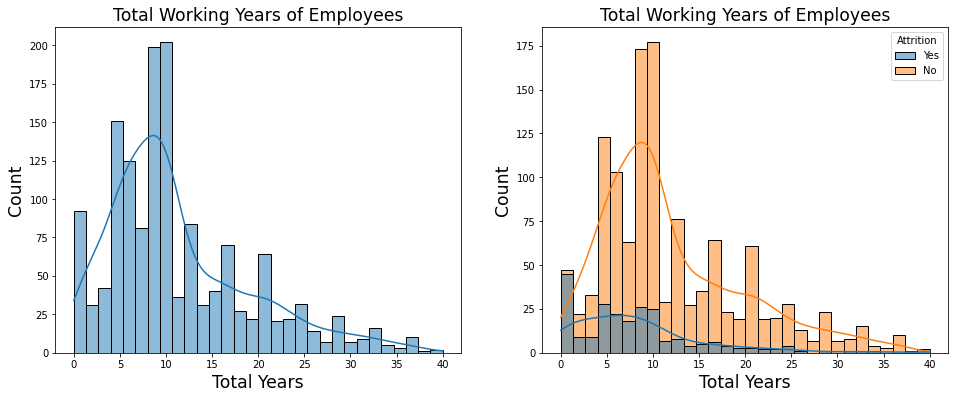

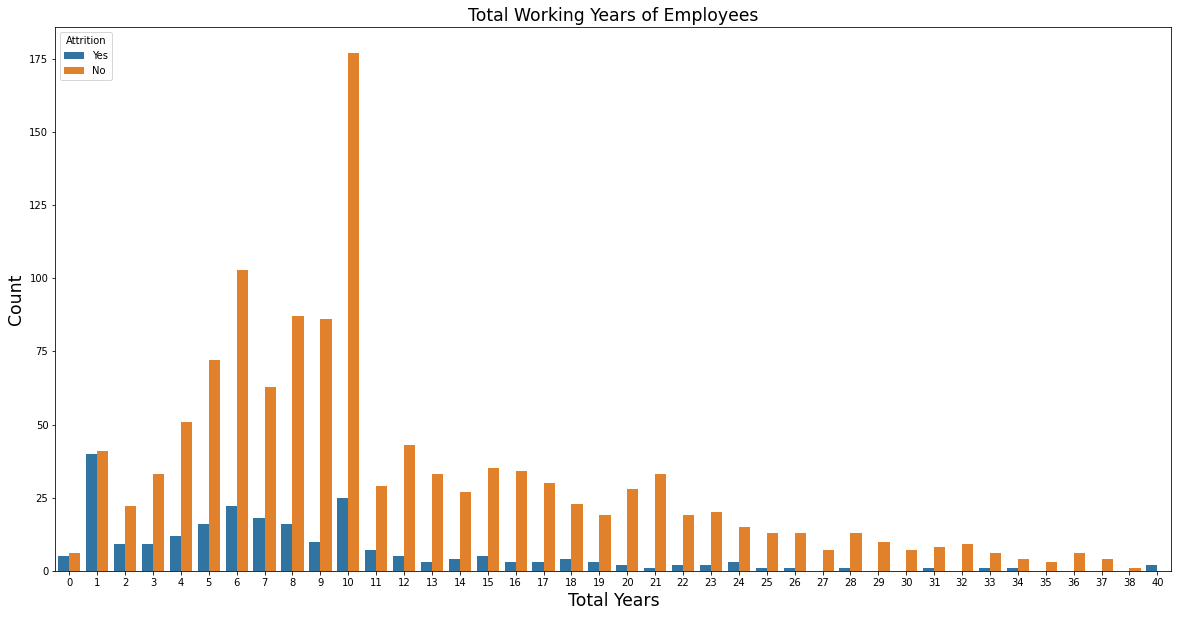

In [69]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(x='TotalWorkingYears',data=df,kde=True,bins=30)
plt.title('Total Working Years of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Total Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
sns.histplot(x='TotalWorkingYears',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Total Working Years of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Total Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.figure(figsize=(20,10))
sns.countplot(x='TotalWorkingYears',data=df,hue='Attrition')
plt.title('Total Working Years of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Total Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.show()

## Effect of % Salary Hike :

Text(0.5, 1.0, '% of No Attrition w.r.t % of Salary Hike')

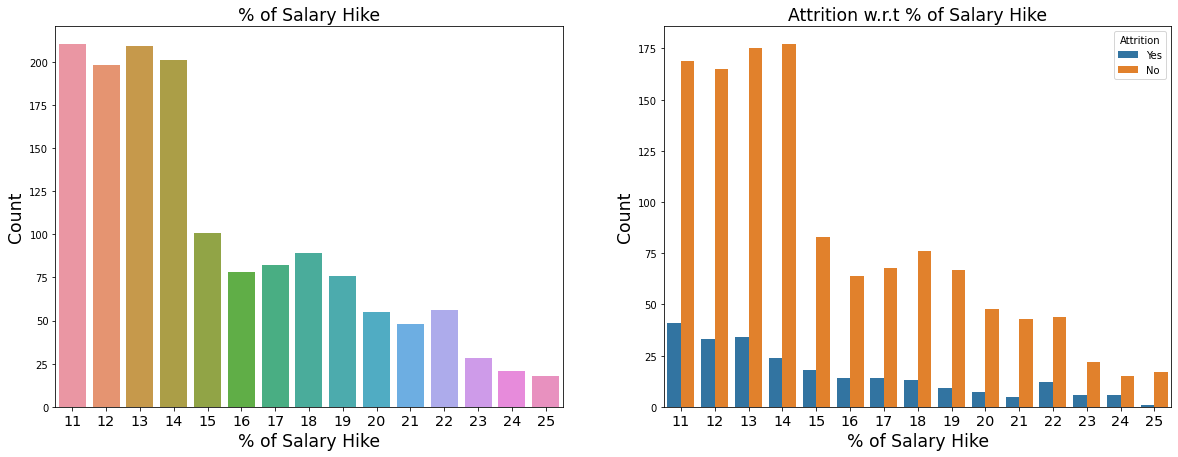

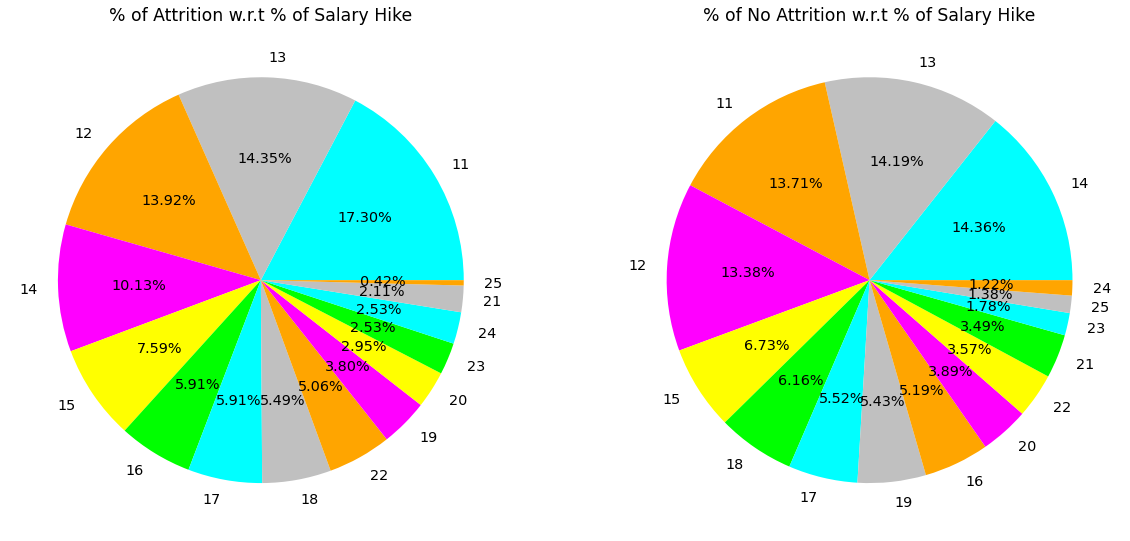

In [70]:
plt.subplots(1,2,figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x='PercentSalaryHike',data=df)
plt.title('% of Salary Hike',fontdict={'fontsize':'xx-large'})
plt.xlabel('% of Salary Hike',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='PercentSalaryHike',data=df,hue='Attrition')
plt.title('Attrition w.r.t % of Salary Hike',fontdict={'fontsize':'xx-large'})
plt.xlabel('% of Salary Hike',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.subplots(1,2,figsize=(20,10))

plt.subplot(1,2,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['PercentSalaryHike'].value_counts(),labels=Attrition_yes['PercentSalaryHike'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','silver','orange','magenta','yellow','lime'])
plt.title('% of Attrition w.r.t % of Salary Hike',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['PercentSalaryHike'].value_counts(),labels=Attrition_no['PercentSalaryHike'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','silver','orange','magenta','yellow','lime'])
plt.title('% of No Attrition w.r.t % of Salary Hike',fontdict={'fontsize':'xx-large'})

## Effect of Performance Rating :

In [71]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

Text(0.5, 1.0, '% of Attrition w.r.t Performance Rating 4')

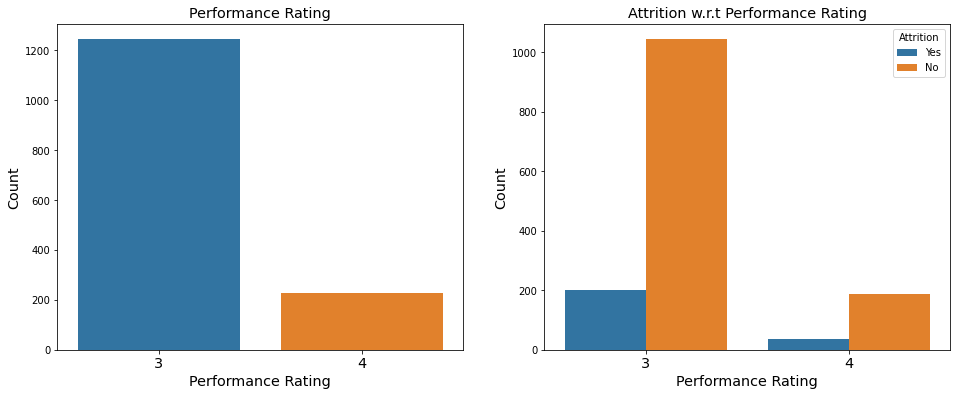

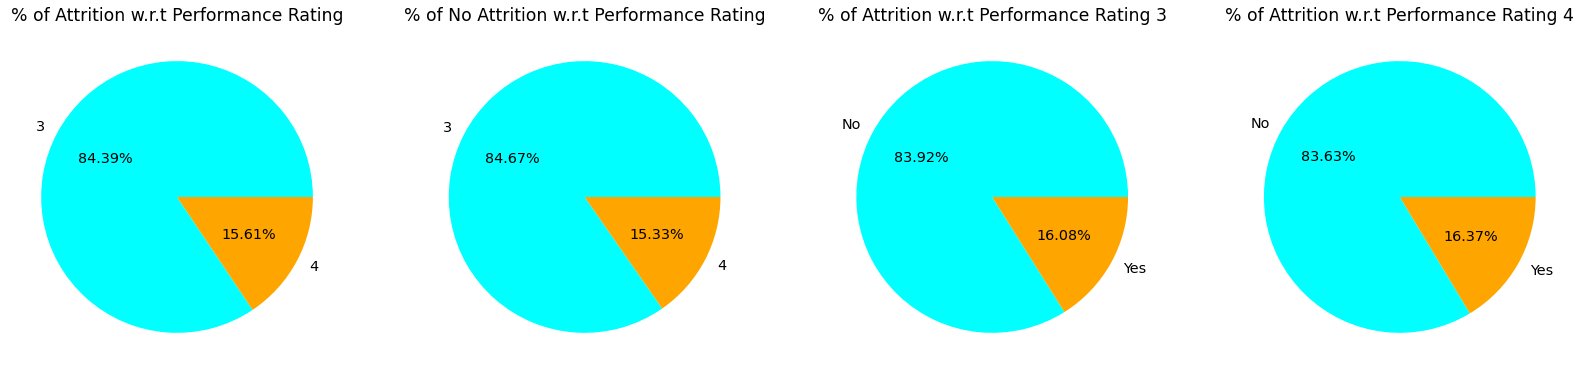

In [72]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(x='PerformanceRating',data=df)
plt.title('Performance Rating',fontdict={'fontsize':'x-large'})
plt.xlabel('Performance Rating',fontdict={'fontsize':'x-large'})
plt.ylabel('Count',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize='x-large')

plt.subplot(1,2,2)
sns.countplot(x='PerformanceRating',data=df,hue='Attrition')
plt.title('Attrition w.r.t Performance Rating',fontdict={'fontsize':'x-large'})
plt.xlabel('Performance Rating',fontdict={'fontsize':'x-large'})
plt.ylabel('Count',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize='x-large')

plt.subplots(1,4,figsize=(28,14))

plt.subplot(1,4,1)
Attrition_yes=df[df['Attrition']=='Yes']
plt.pie(Attrition_yes['PerformanceRating'].value_counts(),labels=Attrition_yes['PerformanceRating'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Performance Rating',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,2)
Attrition_no=df[df['Attrition']=='No']
plt.pie(Attrition_no['PerformanceRating'].value_counts(),labels=Attrition_no['PerformanceRating'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of No Attrition w.r.t Performance Rating',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,3)
plt.pie(df[df['PerformanceRating']==3]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Performance Rating 3',fontdict={'fontsize':'xx-large'})

plt.subplot(1,4,4)
plt.pie(df[df['PerformanceRating']==4]['Attrition'].value_counts(),labels=['No','Yes'],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange'])
plt.title('% of Attrition w.r.t Performance Rating 4',fontdict={'fontsize':'xx-large'})


## Effect of Years at Company :

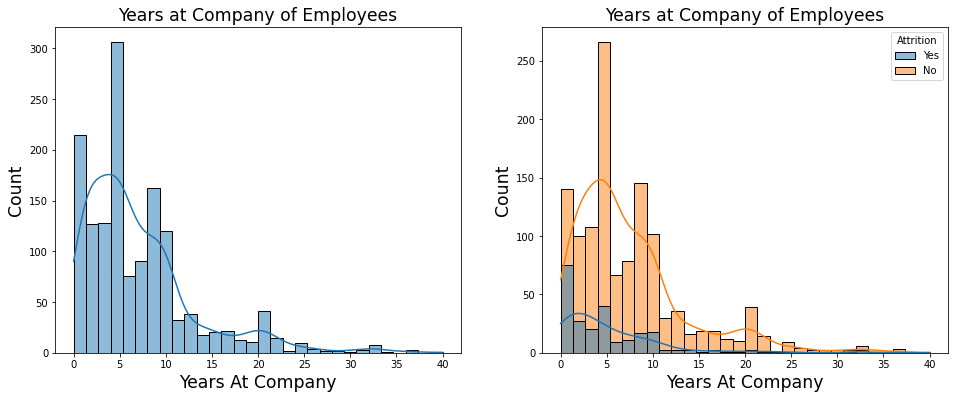

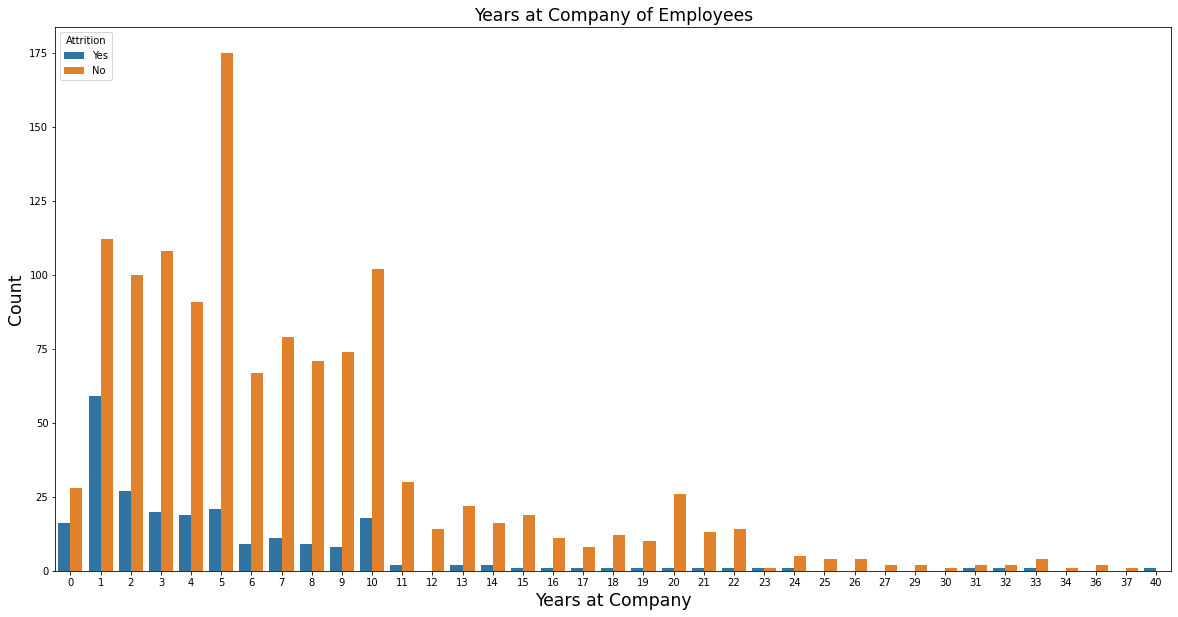

In [73]:
plt.subplots(1,2,figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(x='YearsAtCompany',data=df,kde=True,bins=30)
plt.title('Years at Company of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years At Company',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
sns.histplot(x='YearsAtCompany',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Years at Company of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years At Company',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.figure(figsize=(20,10))
sns.countplot(x='YearsAtCompany',data=df,hue='Attrition')
plt.title('Years at Company of Employees',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years at Company',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.show()

## Job Involvement and Job Satisfaction w.r.t Years At Company :

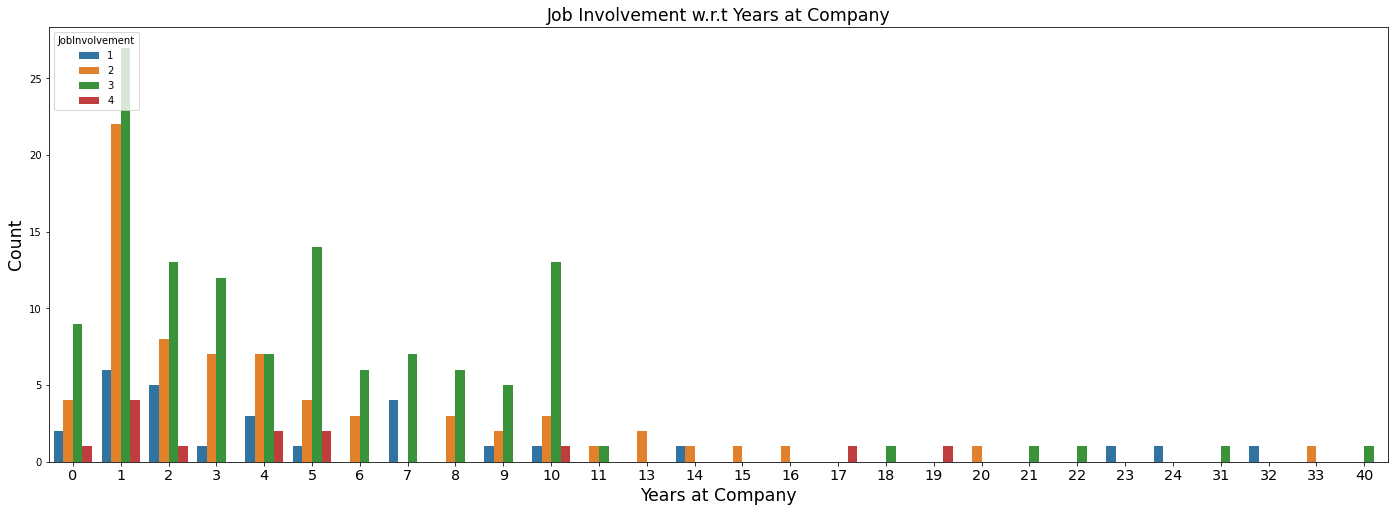

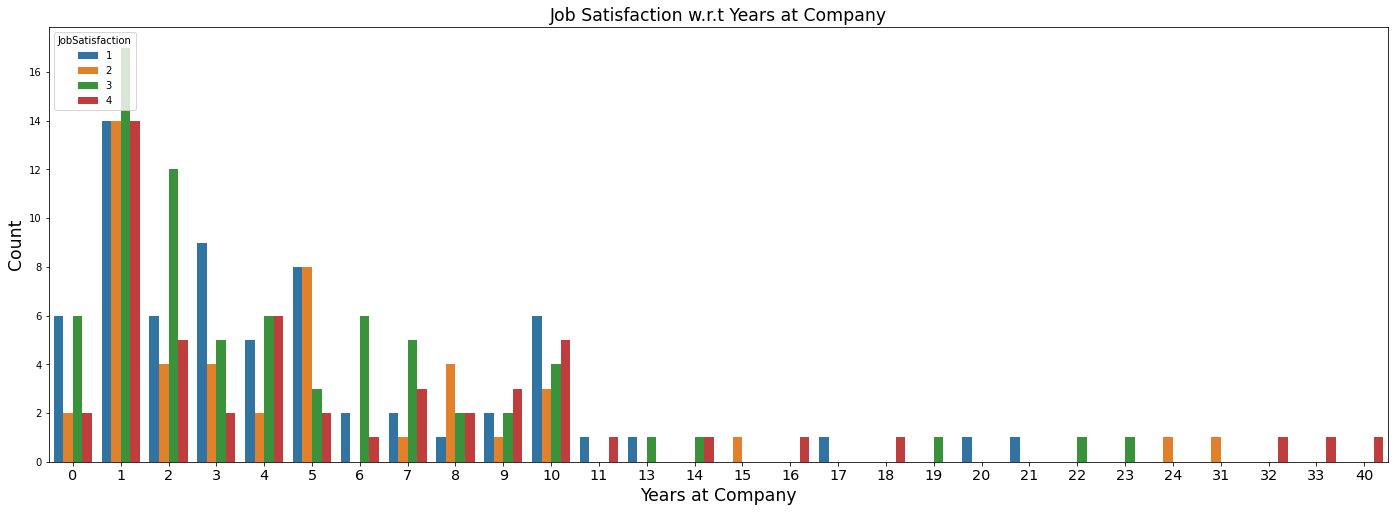

In [74]:
plt.figure(figsize=(24,8))
sns.countplot(x='YearsAtCompany',data=df[df['Attrition']=='Yes'],hue='JobInvolvement')
plt.title('Job Involvement w.r.t Years at Company',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years at Company',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.figure(figsize=(24,8))
sns.countplot(x='YearsAtCompany',data=df[df['Attrition']=='Yes'],hue='JobSatisfaction')
plt.title('Job Satisfaction w.r.t Years at Company',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years at Company',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})
plt.xticks(fontsize='x-large')

plt.show()

## Effect of Years Since Last Promotion :

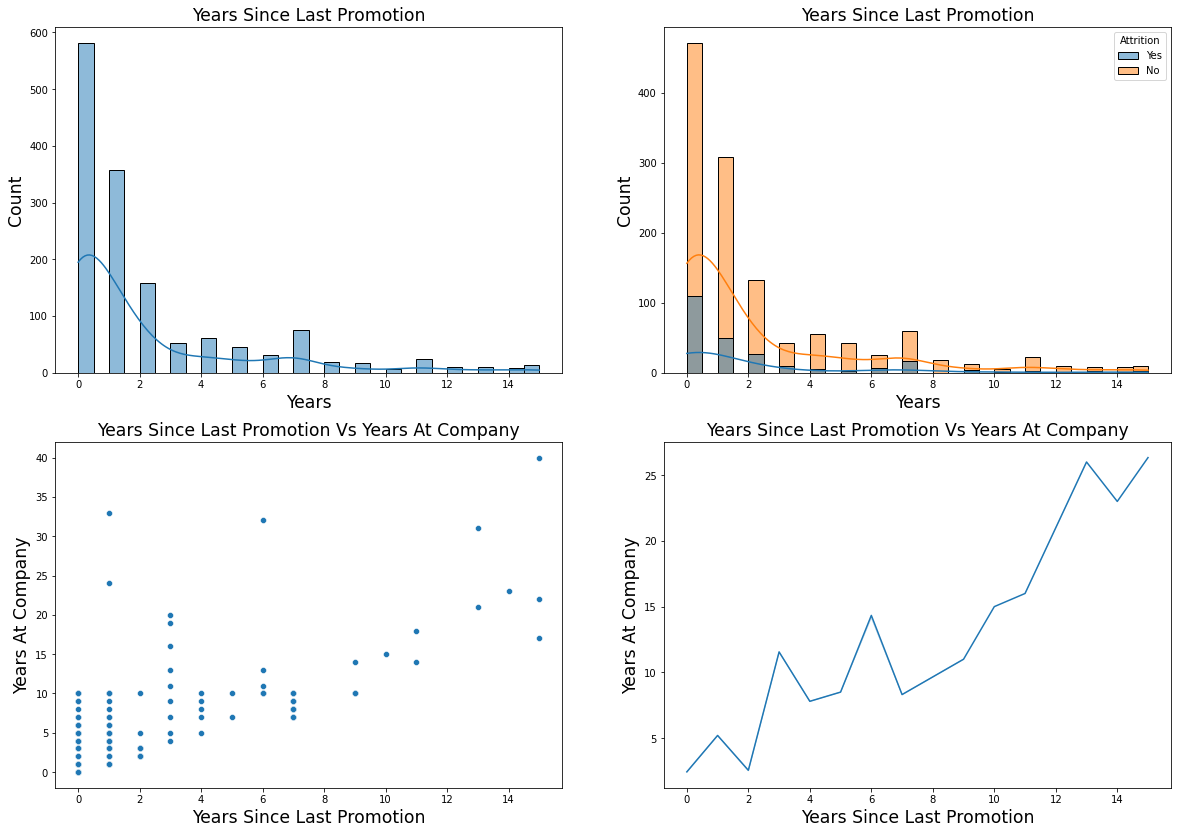

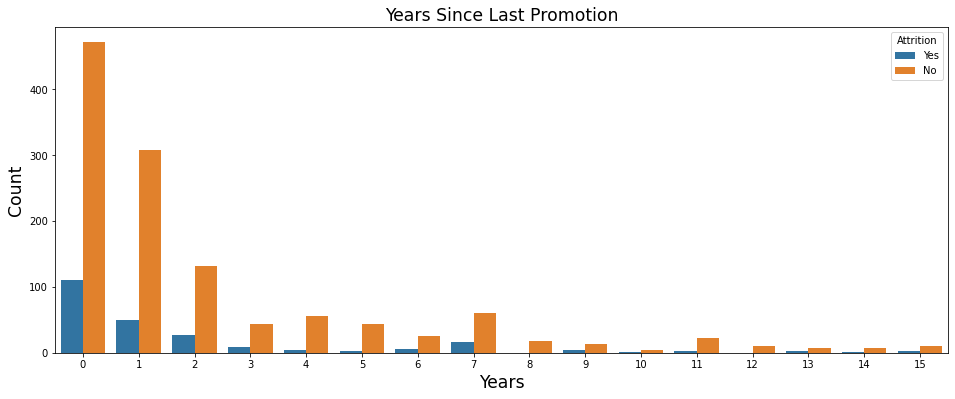

In [75]:
plt.subplots(2,2,figsize=(20,14))

plt.subplot(2,2,1)
sns.histplot(x='YearsSinceLastPromotion',data=df,kde=True,bins=30)
plt.title('Years Since Last Promotion',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,2)
sns.histplot(x='YearsSinceLastPromotion',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Years Since Last Promotion',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,3)
sns.scatterplot(x='YearsSinceLastPromotion',y='YearsAtCompany',data=df[df['Attrition']=='Yes'])
plt.title('Years Since Last Promotion Vs Years At Company',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years Since Last Promotion',fontdict={'fontsize':'xx-large'})
plt.ylabel('Years At Company',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
sns.lineplot(x='YearsSinceLastPromotion',y='YearsAtCompany',data=df[df['Attrition']=='Yes'],ci=0)
plt.title('Years Since Last Promotion Vs Years At Company',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years Since Last Promotion',fontdict={'fontsize':'xx-large'})
plt.ylabel('Years At Company',fontdict={'fontsize':'xx-large'})

plt.figure(figsize=(16,6))
sns.countplot(x='YearsSinceLastPromotion',data=df,hue='Attrition')
plt.title('Years Since Last Promotion',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.show()

## Effect of Years With Current Manager and Years In Current Role:

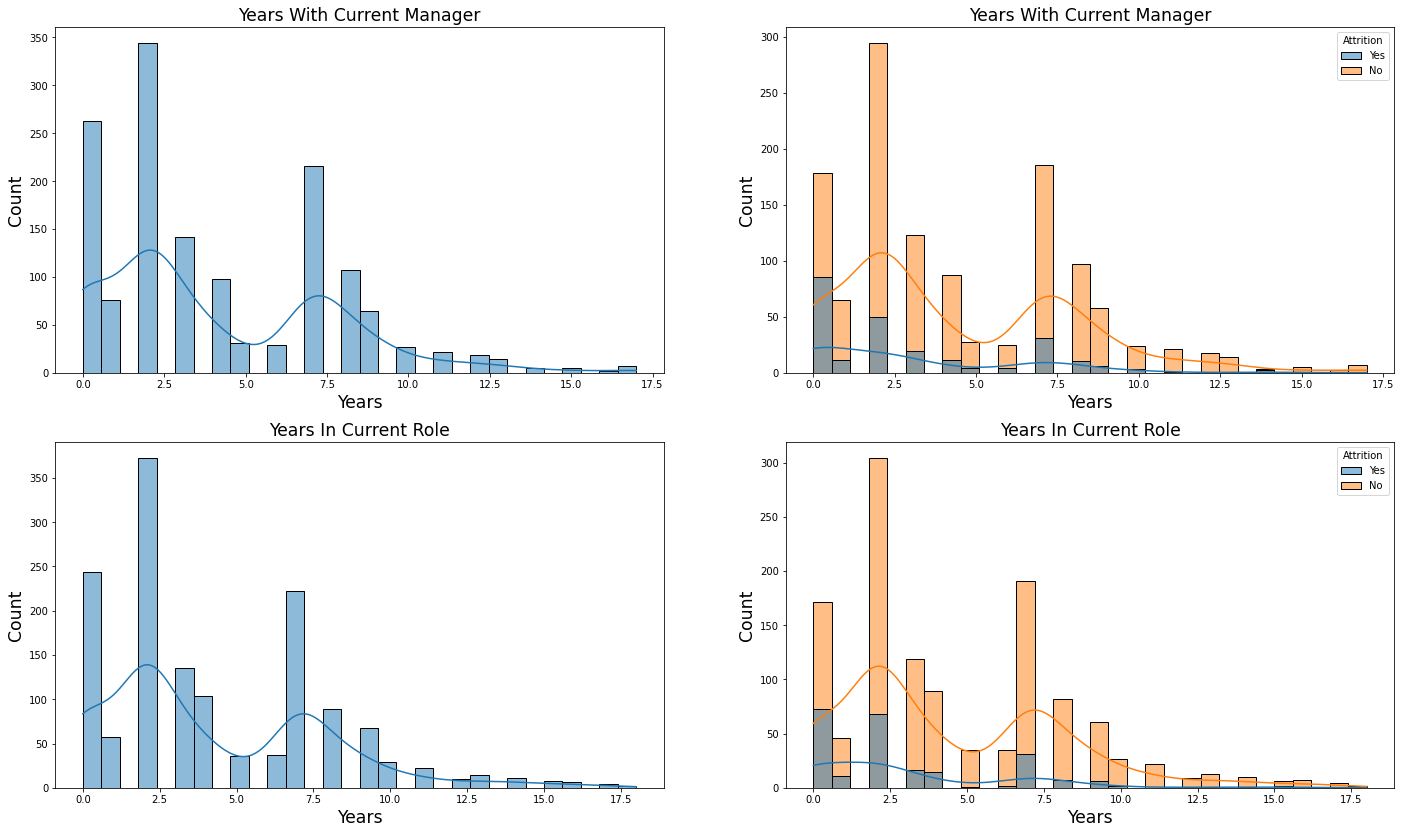

In [76]:
plt.subplots(2,2,figsize=(24,14))

plt.subplot(2,2,1)
sns.histplot(x='YearsWithCurrManager',data=df,kde=True,bins=30)
plt.title('Years With Current Manager',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,2)
sns.histplot(x='YearsWithCurrManager',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Years With Current Manager',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,3)
sns.histplot(x='YearsInCurrentRole',data=df,kde=True,bins=30)
plt.title('Years In Current Role',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,2,4)
sns.histplot(x='YearsInCurrentRole',data=df,kde=True,bins=30,hue='Attrition')
plt.title('Years In Current Role',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.show()

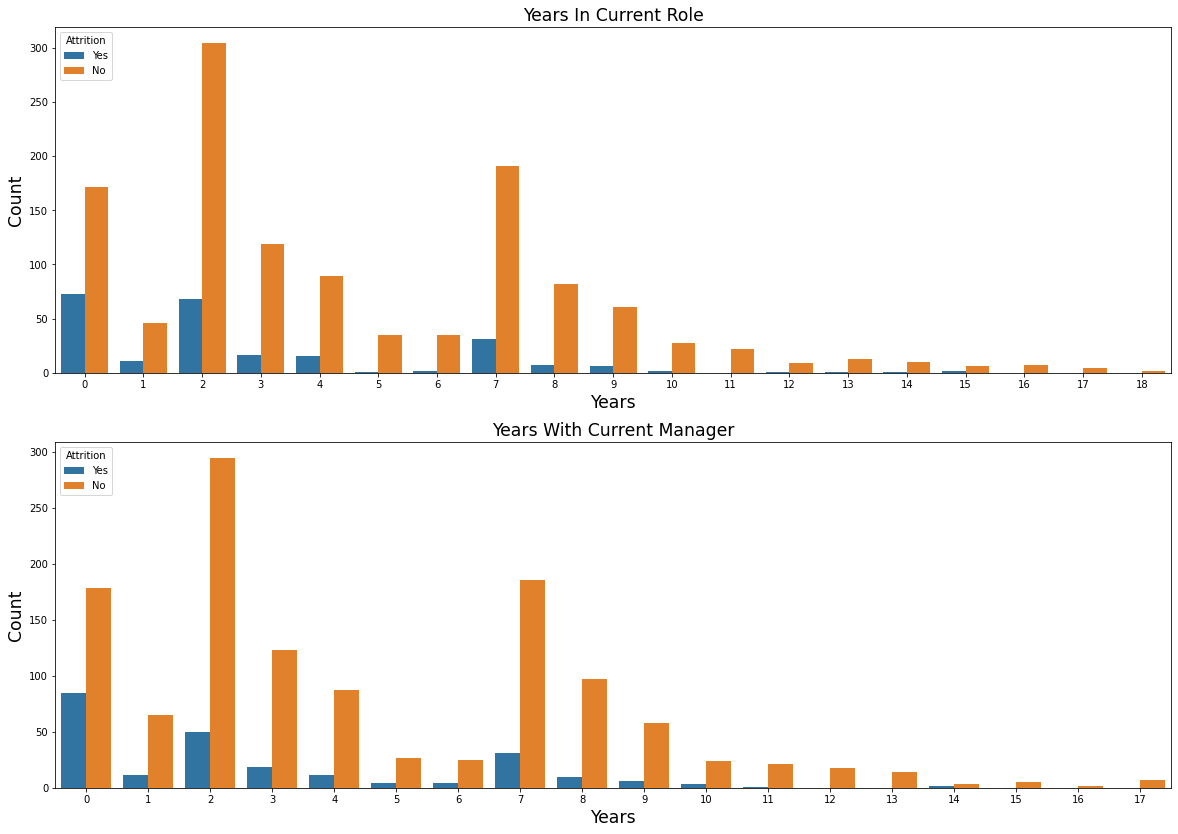

In [77]:
plt.subplots(2,1,figsize=(20,14))

plt.subplot(2,1,1)
sns.countplot(x='YearsInCurrentRole',data=df,hue='Attrition')
plt.title('Years In Current Role',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.subplot(2,1,2)
sns.countplot(x='YearsWithCurrManager',data=df,hue='Attrition')
plt.title('Years With Current Manager',fontdict={'fontsize':'xx-large'})
plt.xlabel('Years',fontdict={'fontsize':'xx-large'})
plt.ylabel('Count',fontdict={'fontsize':'xx-large'})

plt.show()

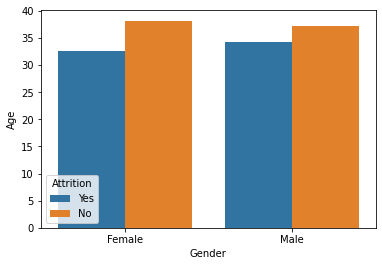

In [78]:
plt.subplots(figsize=(6,4))
sns.barplot(x='Gender',y='Age',hue='Attrition',data=df,ci=False);

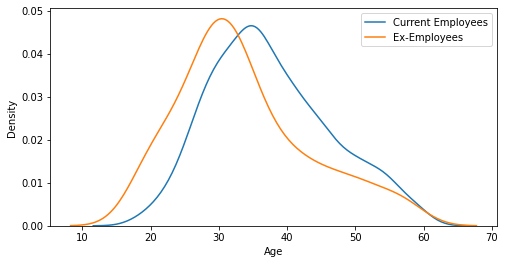

In [79]:
plt.subplots(figsize=(8,4))
sns.kdeplot(df.loc[df.Attrition=='No','Age'],label='Current Employees')
sns.kdeplot(df.loc[df.Attrition=='Yes','Age'],label='Ex-Employees')
plt.legend();

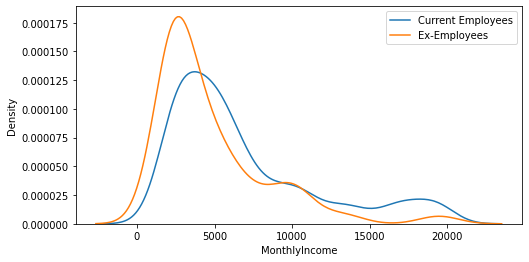

In [80]:
plt.subplots(figsize=(8,4))
sns.kdeplot(df.loc[df.Attrition=='No','MonthlyIncome'],label='Current Employees')
sns.kdeplot(df.loc[df.Attrition=='Yes','MonthlyIncome'],label='Ex-Employees')
plt.legend();

# Conclusion :

#MODEL BUILDING

In [81]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [83]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [84]:
df.kurtosis()

Age                        -0.404145
DailyRate                  -1.203823
DistanceFromHome           -0.224833
Education                  -0.559115
EnvironmentSatisfaction    -1.202521
HourlyRate                 -1.196398
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
MonthlyRate                -1.214956
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
PerformanceRating           1.695939
RelationshipSatisfaction   -1.184814
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
dtype: float64

In [85]:
# correlation check

corr = df.corr()

In [86]:
corr

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  \
Age                       0.509604        -0.004892       0.497855   
DailyRate                 0.002966         0.030571       0.007707   
Dis

<AxesSubplot:>

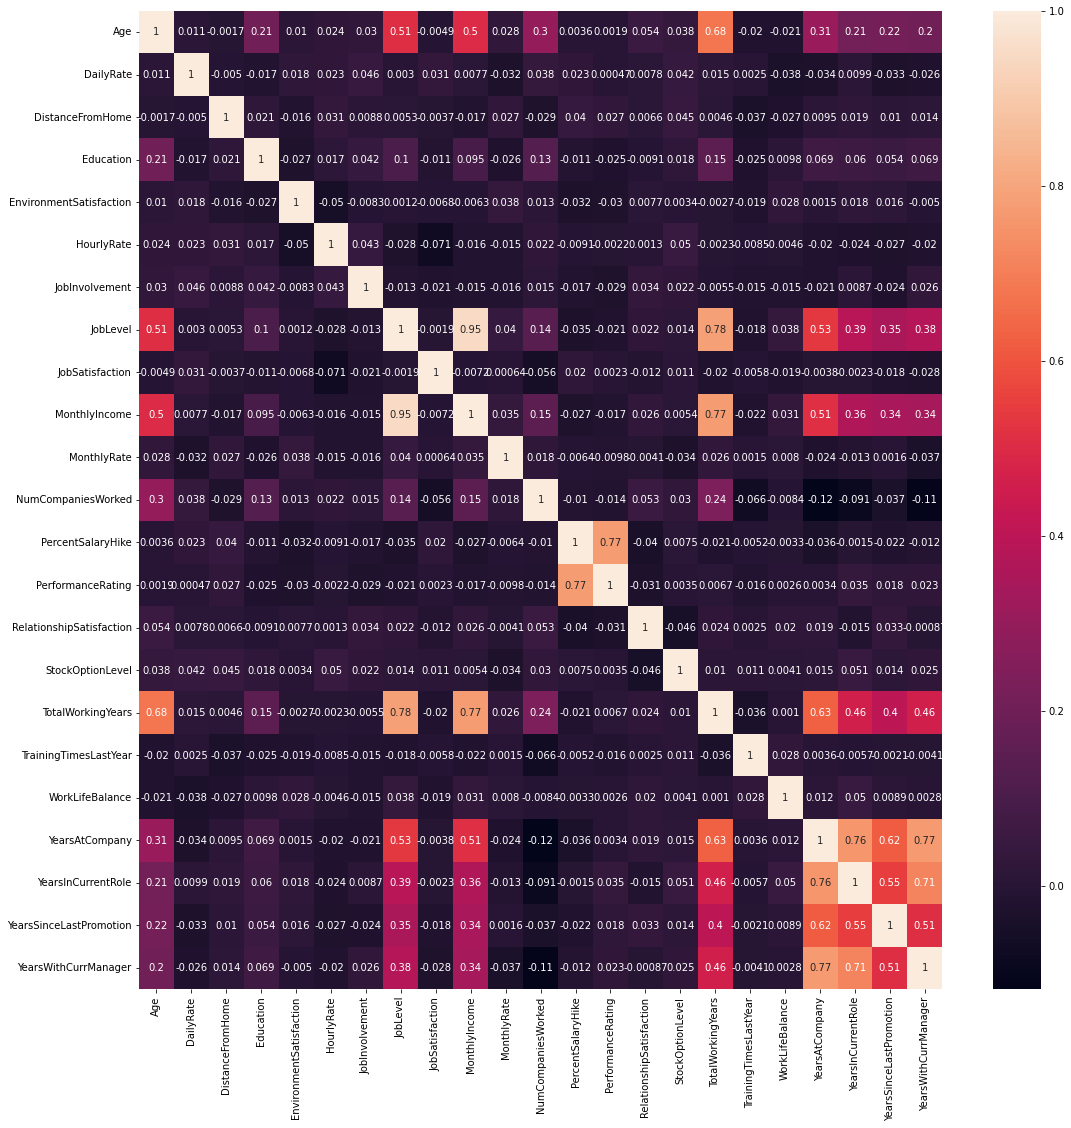

In [91]:
plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True,annot_kws={"size":10})

In [ ]:
# job level and monthly income 0.95 corr degree
# job level and total working years 0.78
# monthly income and total working year 0.77
# percent salary hike and performance rating 0.77

In [ ]:
# yearsatcompany & years current role 0.76
# year at company & years with current manager 0.77

In [92]:
df.drop(['JobLevel',"MonthlyIncome","PercentSalaryHike"],axis=1,inplace=True)

In [94]:
df.drop(["YearsAtCompany"],axis=1,inplace=True)

<AxesSubplot:>

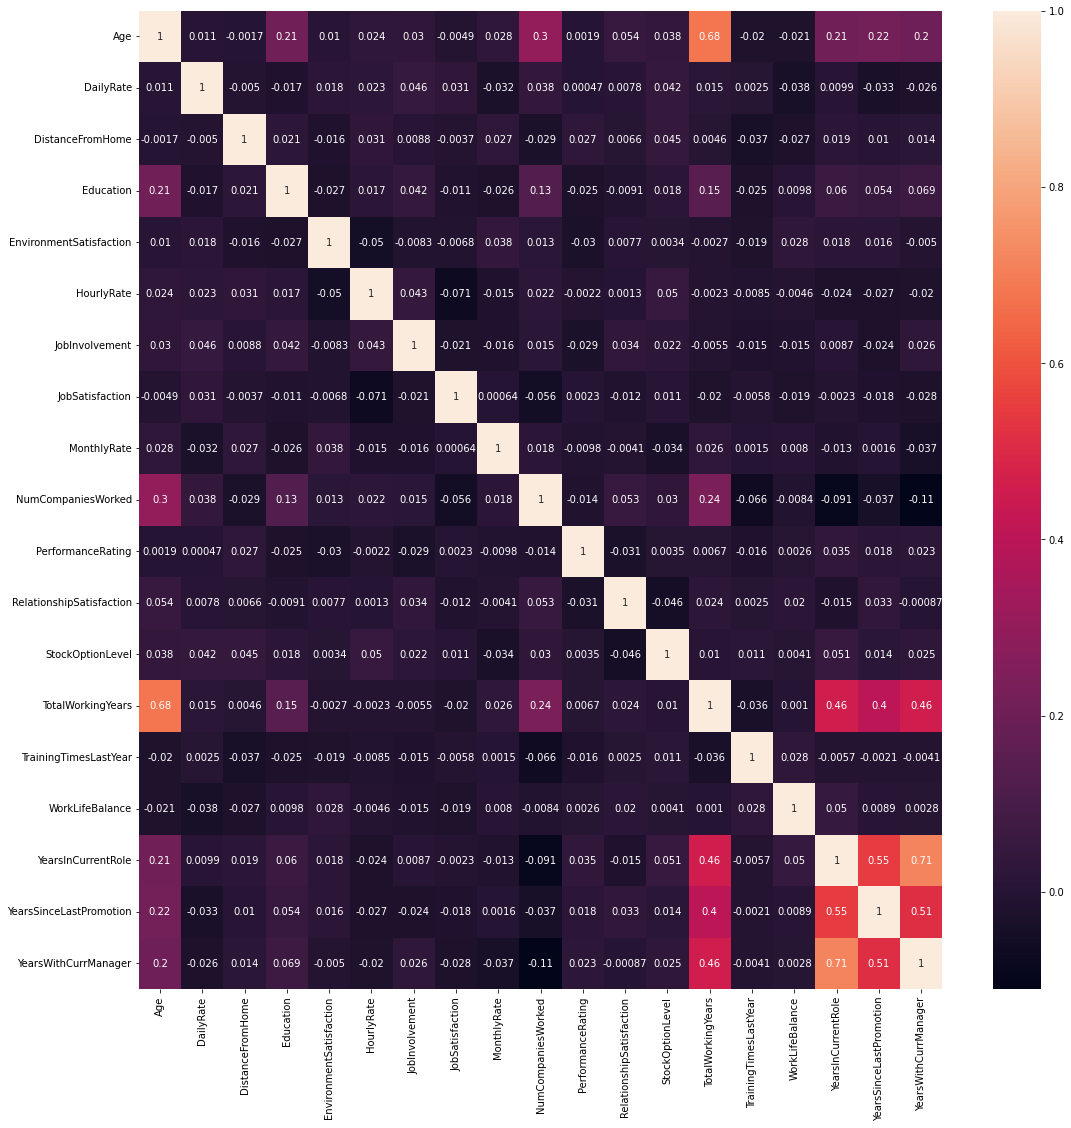

In [95]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":10})

In [96]:
df.shape

(1470, 27)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [ ]:
# many a columns are object type

In [ ]:
# label encoding

In [98]:
from sklearn import preprocessing

In [102]:
# create a basic function to convert all categorical column to numerical
def preprocessor(df):
    df1=df.copy()
    le=preprocessing.LabelEncoder()
    df1["Attrition"]=le.fit_transform(df1["Attrition"])
    df1["BusinessTravel"]=le.fit_transform(df1["BusinessTravel"])
    df1["Department"]=le.fit_transform(df1["Department"])
    df1["EducationField"]=le.fit_transform(df1["EducationField"])
    df1["Gender"]=le.fit_transform(df1["Gender"])
    df1["JobRole"]=le.fit_transform(df1["JobRole"])
    df1["OverTime"]=le.fit_transform(df1["OverTime"])
    df1["MaritalStatus"]=le.fit_transform(df1["MaritalStatus"])
    return df1
    
    

In [103]:
df_final=preprocessor(df)

In [104]:
df_final.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        3       1          61   
2          2               4                        4       1          92   
3          4               1                        4       0          56   
4          1               3                        1       1          40   

   JobInvolvement  JobRole  JobSatisfaction  MaritalStatus  MonthlyRate  \
0               3        7                4              2        19479   
1               2        6                2              1        24907   
2               2        2                3              2         2396   
3               3        6                3              1        23159   
4               3        2                2              1        16632   

   NumCompaniesWorked  OverTime  PerformanceRating  RelationshipSatisfaction  \
0                   8         1                  3                         1   
1                   1         0                  4                         4   
2                   6         1                  3                         2   
3                   1         1                  3                         3   
4                   9         0                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsInCurrentRole  YearsSinceLastPromotion  \
0                1                   4                        0   
1                3                   7                        1   
2                3                   0                        0   
3                3                   7                        3   
4                3                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2

In [105]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [127]:
df_final1=df_final.copy()

In [128]:
# create dependent and independent variable\
X=df_final1.drop(["Attrition"],axis=1)
Y=df_final1["Attrition"]

In [129]:
X.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2       0          94   
1               1                        3       1          61   
2               4                        4       1          92   
3               1                        4       0          56   
4               3                        1       1          40   

   JobInvolvement  JobRole  JobSatisfaction  MaritalStatus  MonthlyRate  \
0               3        7                4              2        19479   
1               2        6                2              1        24907   
2               2        2                3              2         2396   
3               3        6                3              1        23159   
4               3        2                2              1        16632   

   NumCompaniesWorked  OverTime  PerformanceRating  RelationshipSatisfaction  \
0                   8         1                  3                         1   
1                   1         0                  4                         4   
2                   6         1                  3                         2   
3                   1         1                  3                         3   
4                   9         0                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsInCurrentRole  YearsSinceLastPromotion  \
0                1                   4                        0   
1                3                   7                        1   
2                3                   0                        0   
3                3                   7                        3   
4                3                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2

In [112]:
#scaling of data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [113]:
scale=MinMaxScaler()

In [130]:
X_scaled=scale.fit_transform(X)

In [117]:
#X_scaled=pd.DataFrame(X_scaled)

In [118]:
#X_scaled.head()

0    1         2    3         4     5    6         7    8         9   \
0  0.547619  1.0  0.715820  1.0  0.000000  0.25  0.2  0.333333  0.0  0.914286   
1  0.738095  0.5  0.126700  0.5  0.250000  0.00  0.2  0.666667  1.0  0.442857   
2  0.452381  1.0  0.909807  0.5  0.035714  0.25  0.8  1.000000  1.0  0.885714   
3  0.357143  0.5  0.923407  0.5  0.071429  0.75  0.2  1.000000  0.0  0.371429   
4  0.214286  1.0  0.350036  0.5  0.035714  0.00  0.6  0.000000  1.0  0.142857   

         10     11        12   13        14        15   16   17        18  \
0  0.666667  0.875  1.000000  1.0  0.698053  0.888889  1.0  0.0  0.000000   
1  0.333333  0.750  0.333333  0.5  0.916001  0.111111  0.0  1.0  1.000000   
2  0.333333  0.250  0.666667  1.0  0.012126  0.666667  1.0  0.0  0.333333   
3  0.666667  0.750  0.666667  0.5  0.845814  0.111111  1.0  0.0  0.666667   
4  0.666667  0.250  0.333333  0.5  0.583738  1.000000  0.0  0.0  1.000000   

         19     20   21        22        23        24        25  
0  0.000000  0.200  0.0  0.000000  0.222222  0.000000  0.294118  
1  0.333333  0.250  0.5  0.666667  0.388889  0.066667  0.411765  
2  0.000000  0.175  0.5  0.666667  0.000000  0.000000  0.000000  
3  0.000000  0.200  0.5  0.666667  0.388889  0.200000  0.000000  
4  0.333333  0.150  0.5  0.666667  0.111111  0.133333  0.117647

In [131]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [132]:
X_scaled.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.547619             1.0   0.715820         1.0          0.000000   
1  0.738095             0.5   0.126700         0.5          0.250000   
2  0.452381             1.0   0.909807         0.5          0.035714   
3  0.357143             0.5   0.923407         0.5          0.071429   
4  0.214286             1.0   0.350036         0.5          0.035714   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0       0.25             0.2                 0.333333     0.0    0.914286   
1       0.00             0.2                 0.666667     1.0    0.442857   
2       0.25             0.8                 1.000000     1.0    0.885714   
3       0.75             0.2                 1.000000     0.0    0.371429   
4       0.00             0.6                 0.000000     1.0    0.142857   

   JobInvolvement  JobRole  JobSatisfaction  MaritalStatus  MonthlyRate  \
0        0.666667    0.875         1.000000            1.0     0.698053   
1        0.333333    0.750         0.333333            0.5     0.916001   
2        0.333333    0.250         0.666667            1.0     0.012126   
3        0.666667    0.750         0.666667            0.5     0.845814   
4        0.666667    0.250         0.333333            0.5     0.583738   

   NumCompaniesWorked  OverTime  PerformanceRating  RelationshipSatisfaction  \
0            0.888889       1.0                0.0                  0.000000   
1            0.111111       0.0                1.0                  1.000000   
2            0.666667       1.0                0.0                  0.333333   
3            0.111111       1.0                0.0                  0.666667   
4            1.000000       0.0                0.0                  1.000000   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0          0.000000              0.200                    0.0   
1          0.333333              0.250                    0.5   
2          0.000000              0.175                    0.5   
3          0.000000              0.200                    0.5   
4          0.333333              0.150                    0.5   

   WorkLifeBalance  YearsInCurrentRole  YearsSinceLastPromotion  \
0         0.000000            0.222222                 0.000000   
1         0.666667            0.388889                 0.066667   
2         0.666667            0.000000                 0.000000   
3         0.666667            0.388889                 0.200000   
4         0.666667            0.111111                 0.133333   

   YearsWithCurrManager  
0              0.294118  
1              0.411765  
2              0.000000  
3              0.000000  
4              0.117647

In [ ]:
# split into training and testing 

In [133]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.20,random_state=101,stratify=Y)

please aPPly the model 

(1)KNN(2)LOGISTIC REGRESSION(3)(SVM)

CALCULATE THE CONFUSION MATRIX

CLASSIFICATION REPORT
ACCURACY SCORE
ROC AUC CURVE-- IF U CAN MUST TRY